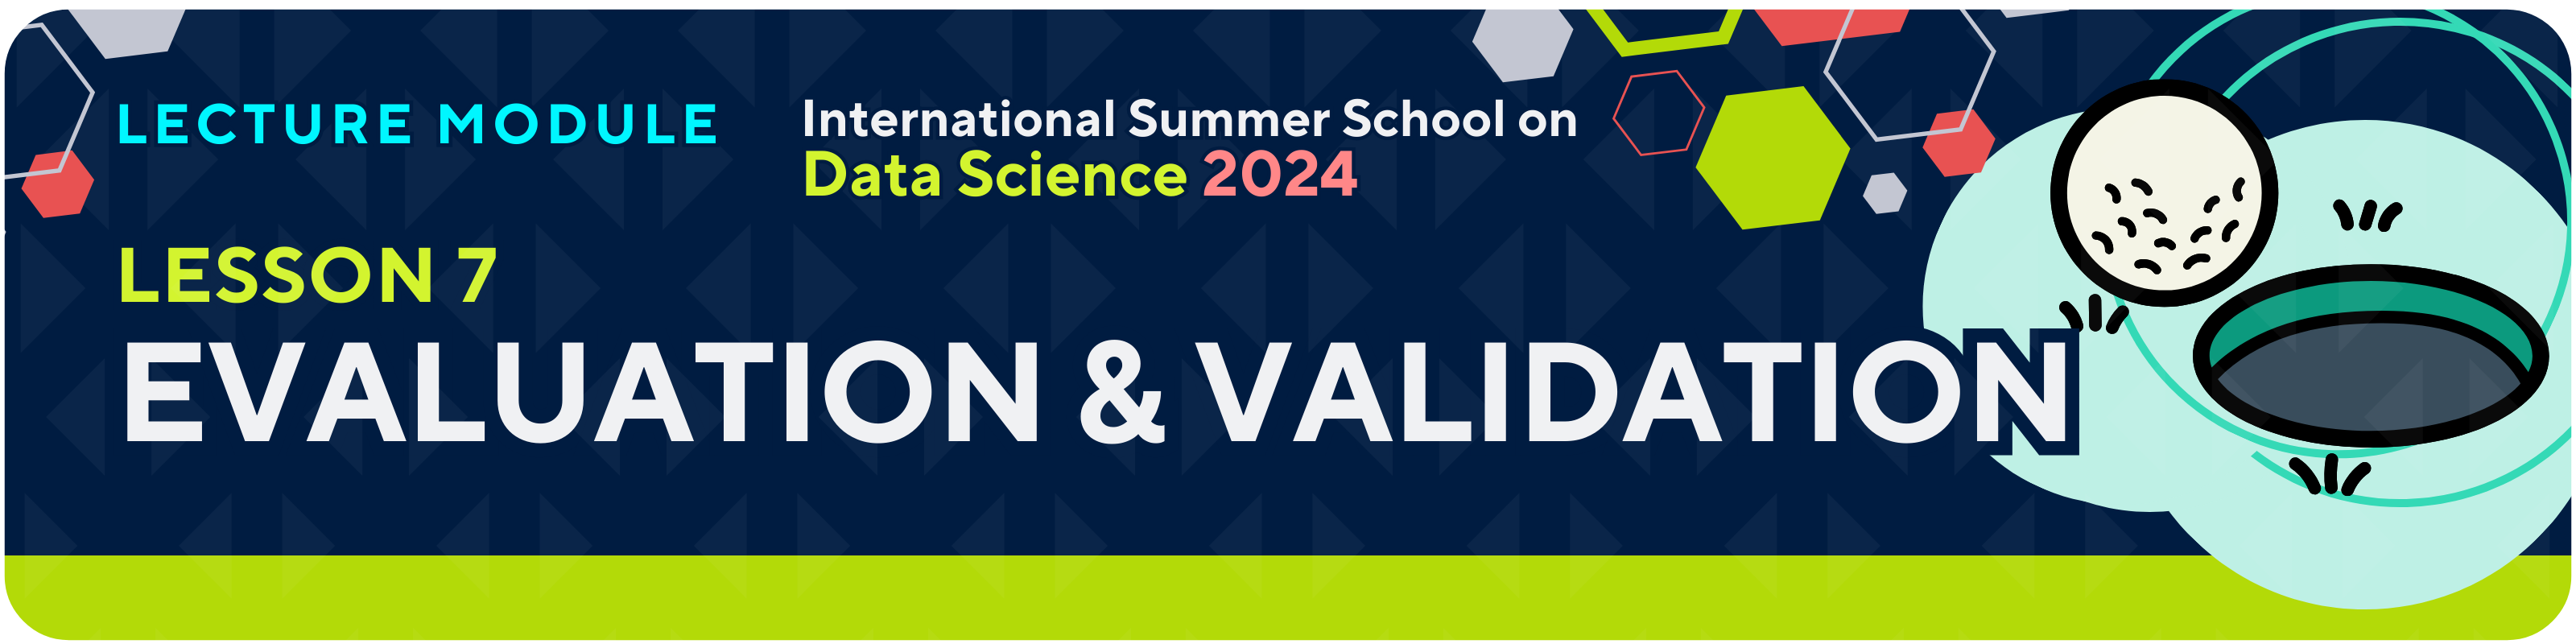

<div class='markdown-google-sans'>

## **07.1**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Classification Metrics**
</div>
<img src="https://i.imgur.com/R9snNLp.png" width=850 />

<img src="https://i.imgur.com/6GPyf31.png" width=850 />



<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>
<img src="https://i.imgur.com/HLUvNWk.png" width=850 />


In [ ]:
# Importing Necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, mean_squared_error
import pandas as pd
import numpy as np

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Scale the numerical columns that are not 'Num_Players'
scaler = StandardScaler()
float_cols = df.drop('Num_Players',axis=1).select_dtypes(include=['float64']).columns
df[float_cols] = scaler.fit_transform(df[float_cols])

# Set feature matrix X and target vector y for both classification
X, y_clf = df.drop(['Play','Num_Players'], axis=1), df['Play']

# Split the data into training and testing sets
X_train, X_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, train_size=0.5, shuffle=False)

# Fit the model
nb_clf = BernoulliNB()
nb_clf.fit(X_train, y_clf_train)
y_clf_pred = nb_clf.predict(X_test)
y_clf_prob = nb_clf.predict_proba(X_test)[:, 1]

# Showing Label and Prediction
clf_result = pd.DataFrame({'Label': y_clf_test, 'Pred': y_clf_pred, 'Pred_Prob': y_clf_prob.round(2)})
clf_result

,Label,Pred,Pred_Prob
14,0,0,0.11
15,1,1,0.91
16,1,0,0.43
17,0,0,0.29
18,0,0,0.22
19,0,0,0.39
20,1,1,0.68
21,1,1,0.60
22,1,0,0.29
23,1,1,0.95


<div class='markdown-google-sans'>

### **<font color=#819A00> Possible Outcomes of Binary Classification**
</div>
<img src="https://i.imgur.com/d43C9wQ.png" width=850 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Accuracy**
</div>
<img src="https://i.imgur.com/BuatInL.png" width=850 />

<img src="https://i.imgur.com/r75aU0d.png" width=850 />


In [ ]:
from sklearn.metrics import accuracy_score
print(f"Accuracy : {accuracy_score(y_clf_test, y_clf_pred):.4f}")

Accuracy : 0.7143


<div class='markdown-google-sans'>

### **<font color=#819A00> Precision**
</div>
<img src="https://i.imgur.com/MpWnI41.png" width=850 />

<img src="https://i.imgur.com/VKjceRT.png" width=850 />


In [ ]:
from sklearn.metrics import precision_score
print(f"Precision : {precision_score(y_clf_test, y_clf_pred, average='binary'):.4f}")

Precision : 0.8571


<div class='markdown-google-sans'>

### **<font color=#819A00> Recall**
</div>
<img src="https://i.imgur.com/YRLgumd.png" width=850 />

<img src="https://i.imgur.com/LiWgx8C.png" width=850 />


In [ ]:
from sklearn.metrics import recall_score
print(f"Recall : {recall_score(y_clf_test, y_clf_pred, average='binary'):.4f}")

Recall : 0.6667


<div class='markdown-google-sans'>

### **<font color=#819A00> F1-Score**
</div>
<img src="https://i.imgur.com/OWzKHZG.png" width=850 />

<img src="https://i.imgur.com/JNlvapN.png" width=850 />


In [ ]:
from sklearn.metrics import f1_score
print(f"F1-Score: {f1_score(y_clf_test, y_clf_pred, average='binary'):.4f}")

F1-Score: 0.7500


<div class='markdown-google-sans'>

### **<font color=#819A00> Confusion Matrix**
</div>
<img src="https://i.imgur.com/bzVAwu4.png" width=850 />

<img src="https://i.imgur.com/7M1GOqh.png" width=850 />

<img src="https://i.imgur.com/oyYo95e.png" width=850 />


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_clf_test, y_clf_pred))

[[4 1]
 [3 6]]


<div class='markdown-google-sans'>

### **<font color=#819A00> Visualization Method**
</div>

<div class='markdown-google-sans'>

#### **<font color=#819A00> ROC Curve**
</div>
<img src="https://i.imgur.com/FiNNfvH.png" width=850 />

<img src="https://i.imgur.com/1MnzzwH.png" width=850 />


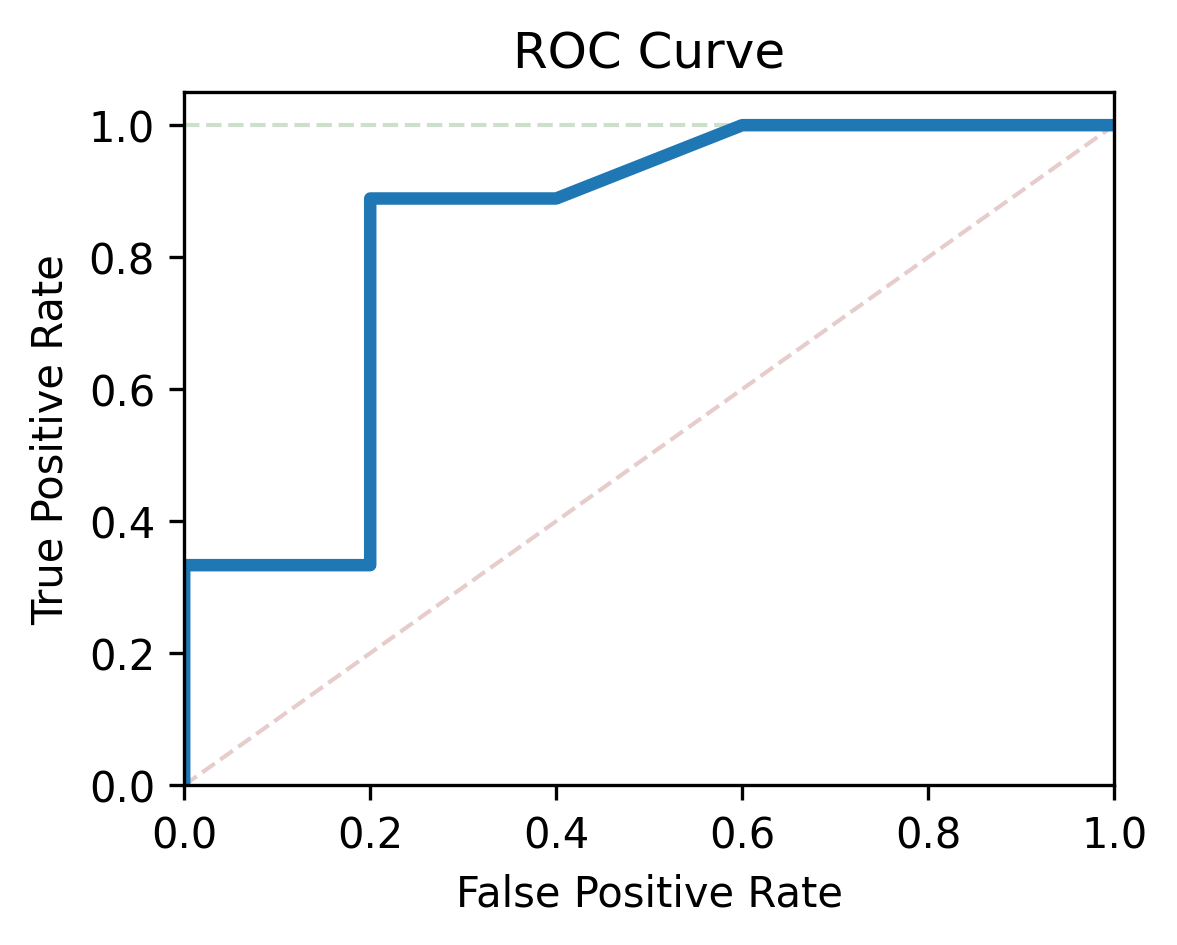

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_clf_test, y_clf_prob)

# Plot the ROC curve
plt.figure(figsize=(4,3), dpi=300)
plt.plot([0, 1], [0, 1], color='darkred', alpha=0.2, lw=1, linestyle='--')
plt.plot([0, 1], [1, 1], color='darkgreen', alpha=0.2, lw=1, linestyle='--')
plt.plot(fpr, tpr,  lw=3, label='ROC curve')
#plt.fill_between(fpr, tpr, alpha=0.15)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<div class='markdown-google-sans'>

#### **<font color=#819A00> ROC-AUC (Area Under ROC Curve)**
</div>




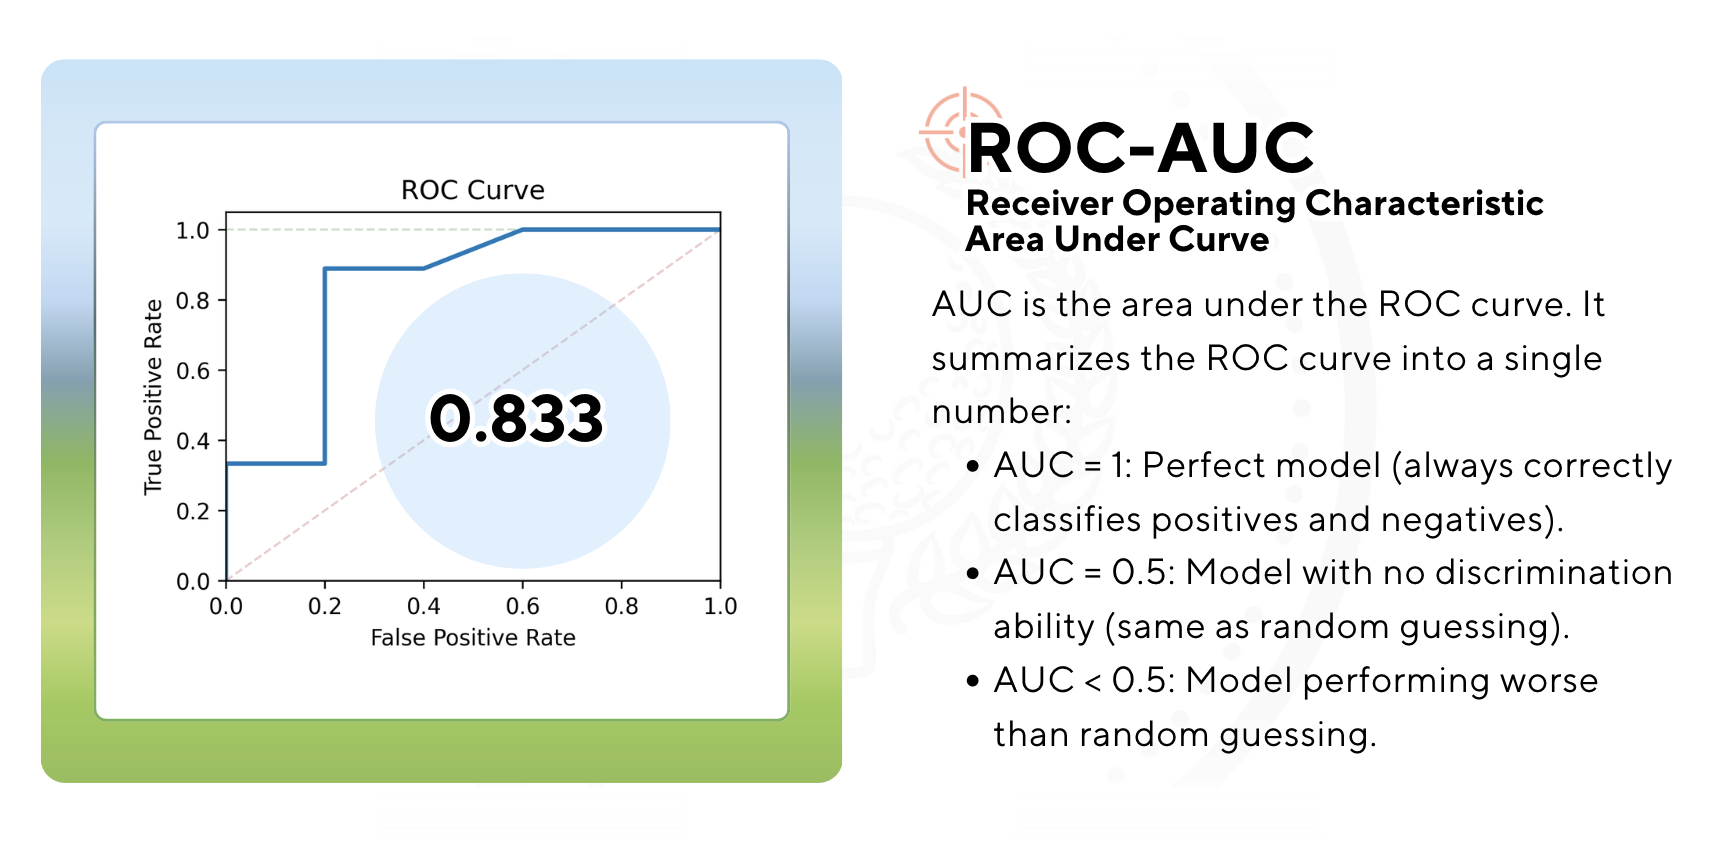


<img src="https://i.imgur.com/k98BoCg.png" width=850 />


In [ ]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_clf_test, y_clf_prob))  # y_clf_prob should be probability estimates of the positive class

0.8333333333333333


<div class='markdown-google-sans'>

#### **<font color=#819A00> Precision-Recall Curve**
</div>

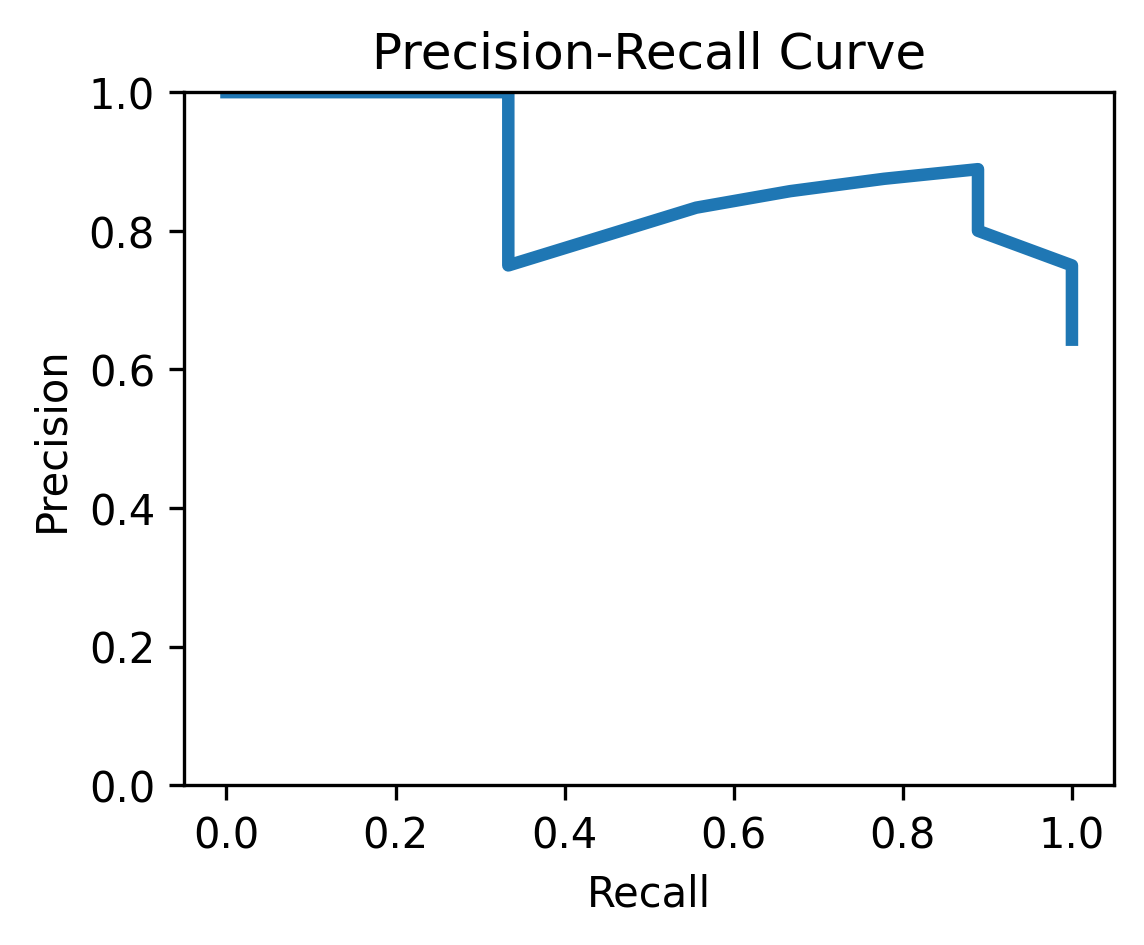

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3), dpi=300)
precision, recall, thresholds = precision_recall_curve(y_clf_test, y_clf_prob)
plt.plot(recall, precision, lw=3)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0, 1])
plt.title('Precision-Recall Curve')
plt.show()

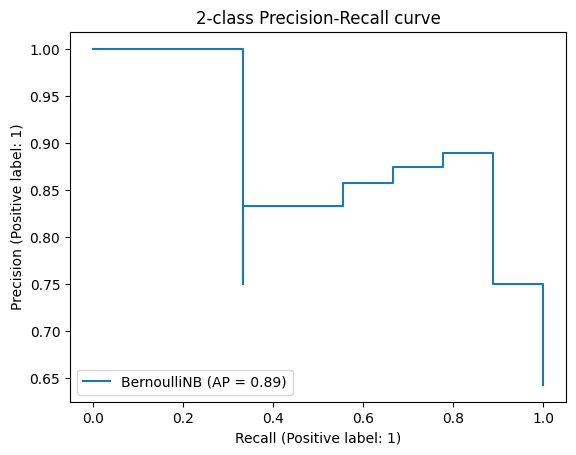

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    nb_clf, X_test, y_clf_test
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Classification Metrics Summarized**
</div>

Accuracy : 0.8571
Precision: 1.0000
Recall   : 0.7778
F1-Score : 0.8750
Confusion Matrix:
[[5 0]
 [2 7]]


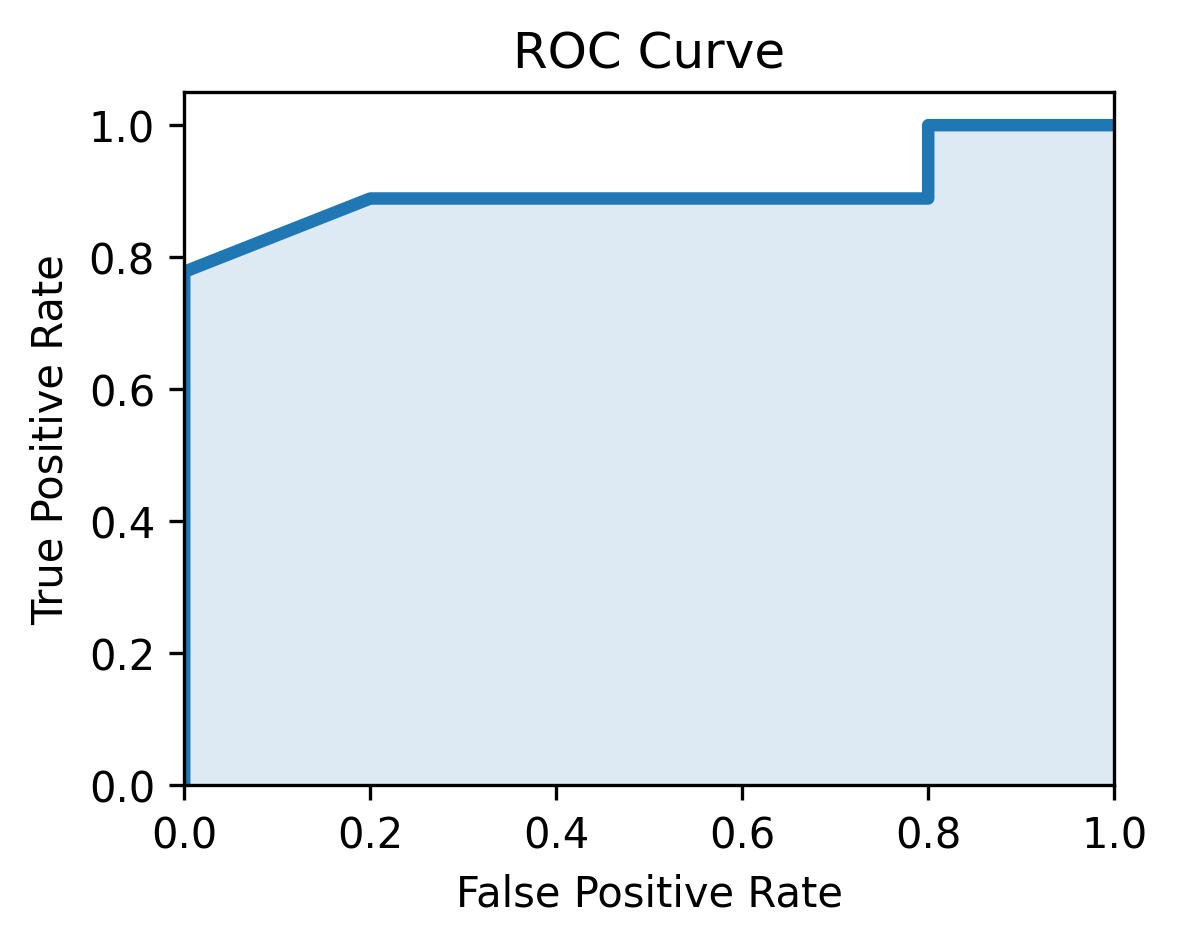

ROC-AUC Score: 0.9


In [ ]:
# IMPORTING DATASET #
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics       import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics       import roc_curve, roc_auc_score
from sklearn.metrics       import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# READ DATA ── Load the dataset from a specified URL.
dataset_url = "https://www.dropbox.com/scl/fi/aau6jg85cooqcd1l31dsg/golf_dataset_mini.csv?rlkey=9zebu7uq63m4jgg9okfhhe1p9&st=go39d6sw&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# ONE-HOT ENCODE COLUMNS
df = pd.get_dummies(df, columns=['Outlook'],  prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# SPLIT THE DATA into training and testing sets
X, y_clf = df.drop(columns='Play'), df['Play']
X_train, X_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, train_size=0.5, shuffle=False)

# SCALE THE NUMERICAL COLUMNS in the training and testing sets
scaler = StandardScaler()
float_cols = X.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# TRAIN THE MODEL
model = AdaBoostClassifier()
model.fit(X_train, y_clf_train)

# MAKE PREDICTION AND PROBABILY
y_clf_pred = model.predict(X_test)
y_clf_prob = model.predict_proba(X_test)[:, 1]

# EVALUATE THE MODEL
print(f"Accuracy : {accuracy_score(y_clf_test, y_clf_pred):.4f}")
print(f"Precision: {precision_score(y_clf_test, y_clf_pred):.4f}")
print(f"Recall   : {recall_score(y_clf_test, y_clf_pred):.4f}")
print(f"F1-Score : {f1_score(y_clf_test, y_clf_pred):.4f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_clf_test, y_clf_pred)}")
#print(f"Classification Report:\n{classification_report(y_clf_test, y_clf_pred)}")

# EVALUATE WITH VISUALIZATION
fpr, tpr, thresholds = roc_curve(y_clf_test, y_clf_prob)

plt.figure(figsize=(4,3), dpi=300)
plt.plot(fpr, tpr,  lw=3, label='ROC curve')
plt.fill_between(fpr, tpr, alpha=0.15)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print(f"ROC-AUC Score: {roc_auc_score(y_clf_test, y_clf_prob)}")

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 07-1**
</div>

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.90      1.00      0.95         9

    accuracy                           0.93        14
   macro avg       0.95      0.90      0.92        14
weighted avg       0.94      0.93      0.93        14



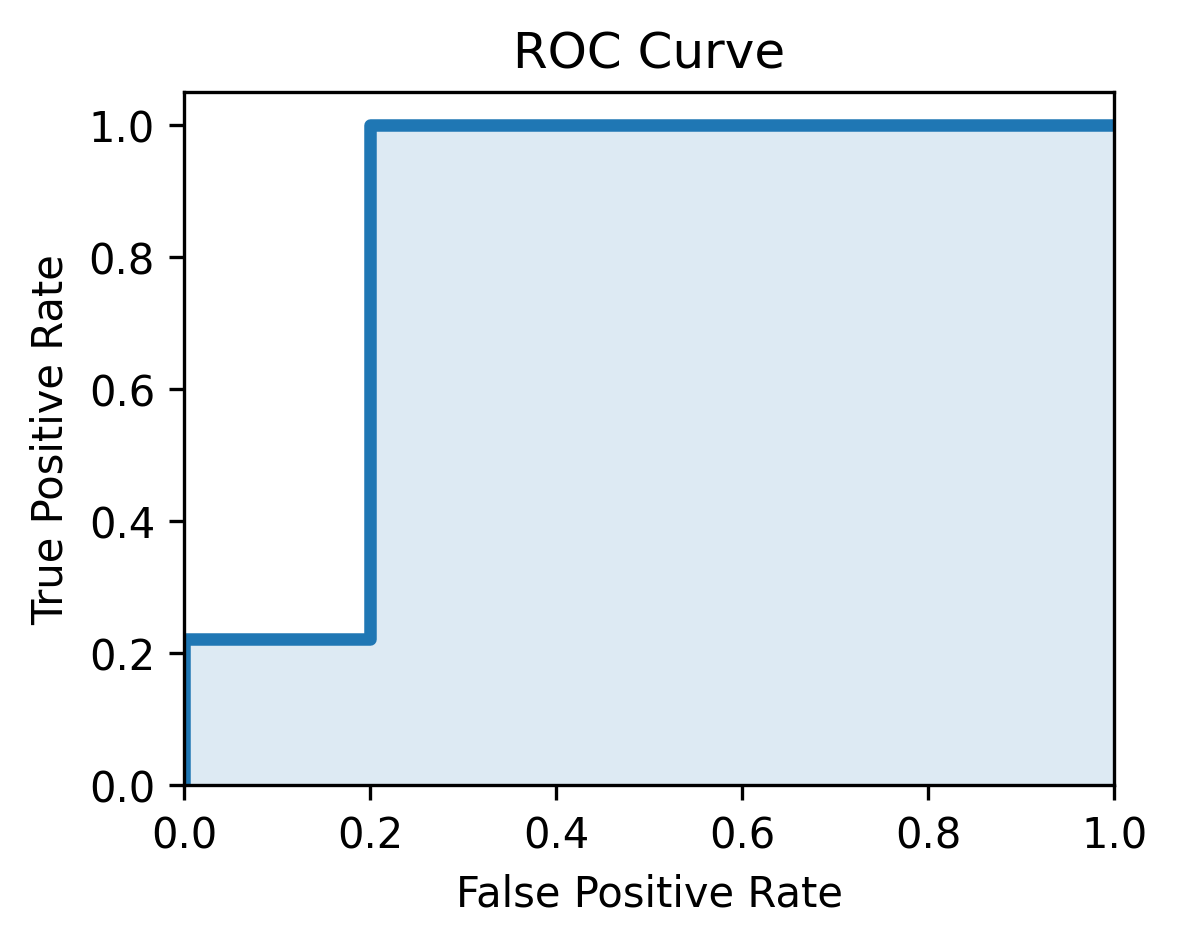

ROC-AUC Score: 0.8444444444444444


In [ ]:
# IMPORTING DATASET #
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Set feature matrix X and target vector y for both classification
X, y_clf = df.drop(['Play','Num_Players'], axis=1), df['Play']

# Split the data into training and testing sets
X_train, X_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, train_size=0.5, shuffle=False)

# SCALE THE NUMERICAL COLUMNS in the training and testing sets
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# FIT THE MODEL
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_clf_train)

# MAKE PREDICTION AND CALCULATE PROBABILITY
y_clf_pred = lr_clf.predict(X_test)
y_clf_prob = lr_clf.predict_proba(X_test)[:, 1]

# PRINT THE CLASSIFICATION REPORT
print(f"Classification Report:\n{classification_report(y_clf_test, y_clf_pred)}")


# VISUALIZE ROC
fpr, tpr, thresholds = roc_curve(y_clf_test, y_clf_prob)

plt.figure(figsize=(4,3), dpi=300)
plt.plot(fpr, tpr,  lw=3, label='ROC curve')
plt.fill_between(fpr, tpr, alpha=0.15)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print(f"ROC-AUC Score: {roc_auc_score(y_clf_test, y_clf_prob)}")

---
---

<div class='markdown-google-sans'>

## **07.2**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Regression Metrics**
</div>
<img src="https://i.imgur.com/VnhaeVv.png" width=850 />



<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>
<img src="https://i.imgur.com/IhnLG3q.png" width=850 />




In [ ]:
# Importing Necessary Libraries
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.width = 0

import numpy as np
np.set_printoptions(edgeitems=30, formatter={'float_kind': '{:.2f}'.format})

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

# Read Data
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Set feature matrix X and target vector y for regression
X, y_reg = df.drop(['Play','Num_Players'], axis=1), df['Num_Players']
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, train_size=0.5, shuffle=False)

# Apply scaling to numerical columns
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# Define & fit the model
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_reg_train)

# Predict the test data
y_reg_pred = dt_reg.predict(X_test).astype(int)

# Showing Label and Prediction
result_df = pd.DataFrame({'Label': y_reg_test, 'Prediction': y_reg_pred})#.sort_values('Absolute Error')
print(result_df)

    Label  Prediction
14     33          39
15     29          23
16     25          33
17     51          49
18     41          39
19     14          13
20     34          23
21     29          33
22     49          49
23     36          43
24     57          49
25     21          23
26     23          28
27     41          43


<div class='markdown-google-sans'>

### **<font color=#819A00> Root Mean Square Error (RMSE)**
</div>
<img src="https://i.imgur.com/IHxmmJ6.png" width=850 />

<img src="https://i.imgur.com/mnUDd22.png" width=850 />


In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_reg_test, y_reg_pred, squared=False))

5.529143565818179


<div class='markdown-google-sans'>

### **<font color=#819A00> Mean Absolute Error (MAE)**
</div>
<img src="https://i.imgur.com/ueFsow7.png" width=850 />

<img src="https://i.imgur.com/n3Xl1Z2.png" width=850 />


In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_reg_test, y_reg_pred))

4.571428571428571


<div class='markdown-google-sans'>

### **<font color=#819A00> Mean Squared Error (MSE)**
</div>
<img src="https://i.imgur.com/RY89Y95.png" width=850 />

<img src="https://i.imgur.com/aJ3LzD9.png" width=850 />


In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_reg_test, y_reg_pred))

30.571428571428573


<div class='markdown-google-sans'>

### **<font color=#819A00> Mean Squared Logarithmic Error (MSLE)**
</div>
<img src="https://i.imgur.com/4rE7Fk4.png" width=850 />

<img src="https://i.imgur.com/iUDkMLy.png" width=850 />


In [ ]:
from sklearn.metrics import mean_squared_log_error
print(mean_squared_log_error(y_reg_test, y_reg_pred))

0.02946183833890431


<div class='markdown-google-sans'>

### **<font color=#819A00> Median Absolute Error (MedAE)**
</div>
<img src="https://i.imgur.com/Nd3idAa.png" width=850 />

<img src="https://i.imgur.com/kxLfNEo.png" width=850 />


In [ ]:
from sklearn.metrics import median_absolute_error
print(median_absolute_error(y_reg_test, y_reg_pred))

4.5


<div class='markdown-google-sans'>

### **<font color=#819A00> R-squared (R²)**
</div>
<img src="https://i.imgur.com/UYvQYsA.png" width=850 />

<img src="https://i.imgur.com/8OcY050.png" width=850 />


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_reg_test, y_reg_pred))

0.7820218996689585


<div class='markdown-google-sans'>

### **<font color=#819A00> Visualization Method**
</div>

<div class='markdown-google-sans'>

#### **<font color=#819A00> Residual Plot**
</div>

<img src="https://i.imgur.com/PghhamP.png" width=850 />

<img src="https://i.imgur.com/UuerQxM.png" width=850 />


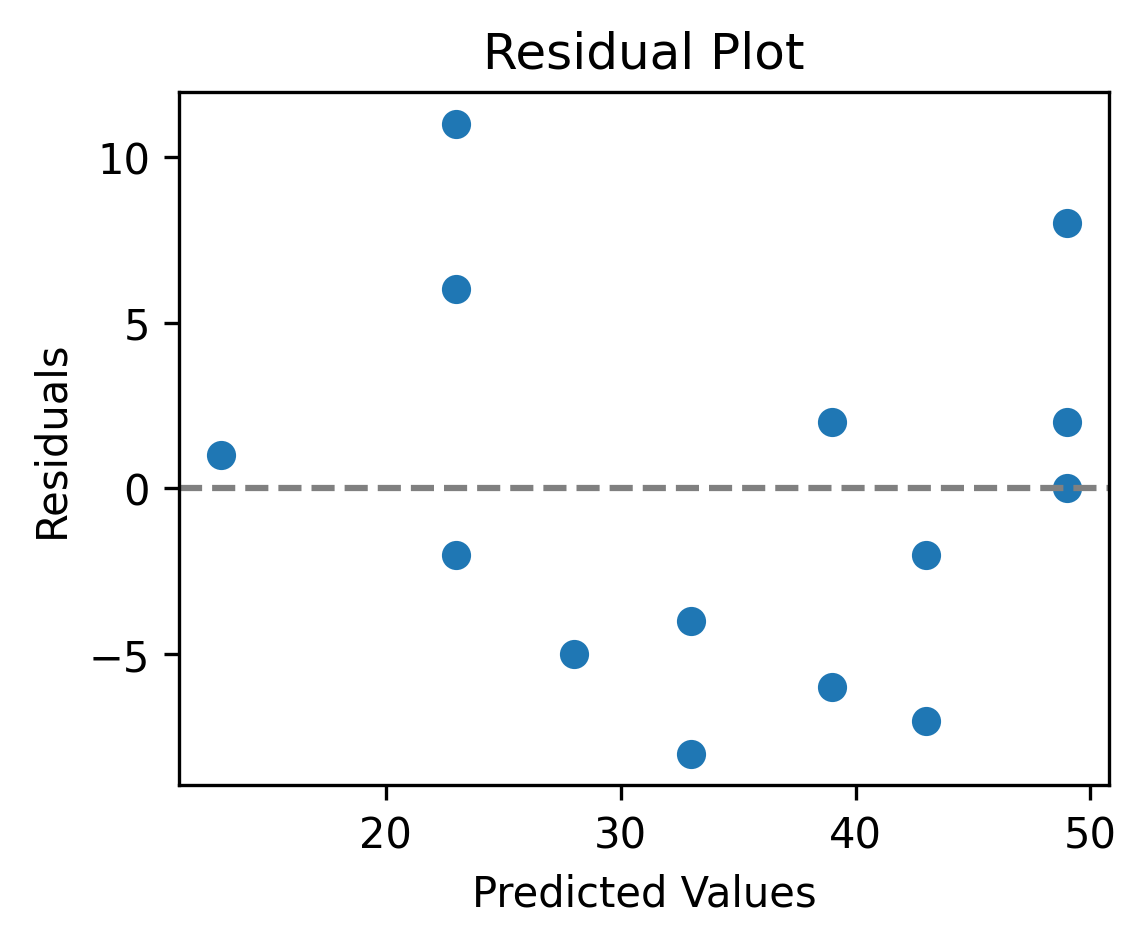

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate residuals
residuals = y_reg_test - y_reg_pred

# Create a DataFrame for easy plotting
result_df = pd.DataFrame({'Actual': y_reg_test, 'Predicted': y_reg_pred, 'Residuals': residuals})

# Create the residual plot
plt.figure(figsize=(4, 3), dpi=300)
plt.scatter(result_df['Predicted'], result_df['Residuals'])
plt.axhline(y=0, color='grey', linestyle='--')  # Add a horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


<div class='markdown-google-sans'>

#### **<font color=#819A00> Scatter Plot of Predictions vs. Actual Values**
</div>

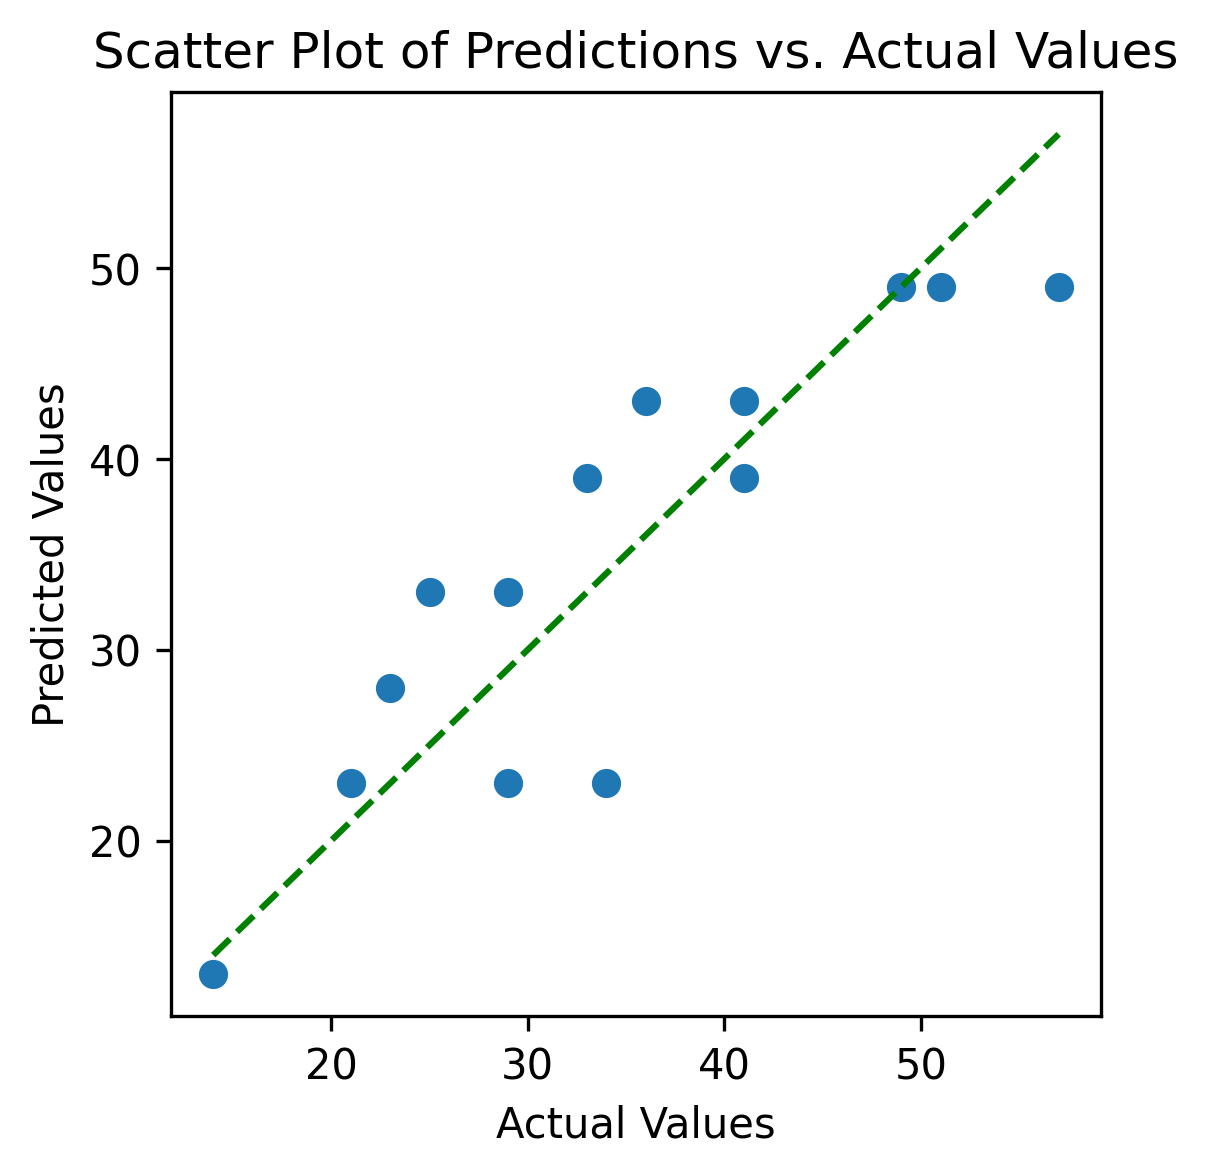

In [ ]:
result_df = pd.DataFrame({'Actual': y_reg_test, 'Predicted': y_reg_pred})

# Create the scatter plot
plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(result_df['Actual'], result_df['Predicted'])
plt.plot([result_df['Actual'].min(), result_df['Actual'].max()], [result_df['Actual'].min(), result_df['Actual'].max()], 'g--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predictions vs. Actual Values')
plt.show()


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Regression Metrics Summarized**
</div>

Root Mean Squared Error : 5.5291
Mean Absolute Error     : 4.5714
Mean Sq Log Error       : 0.0295
Median Absolute Error   : 4.5000
R2 Score                : 0.7820


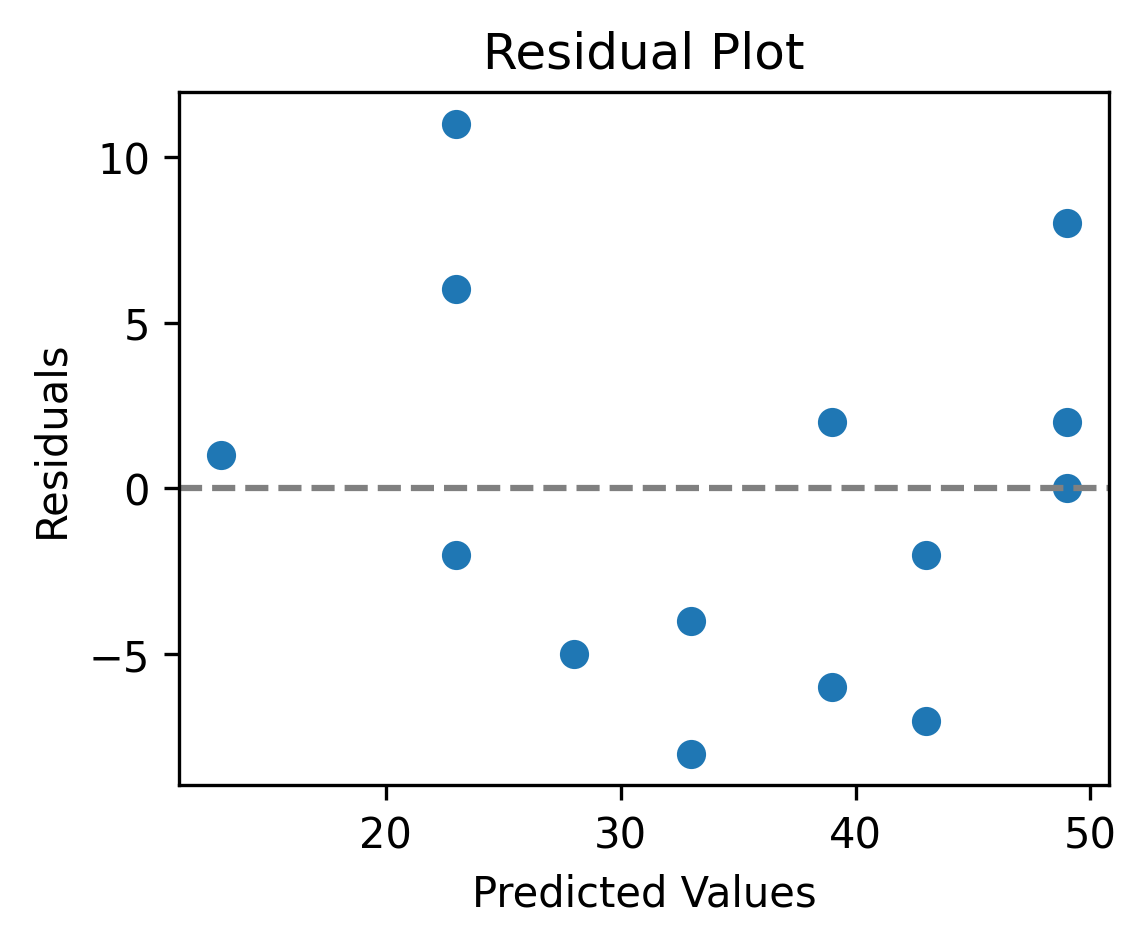

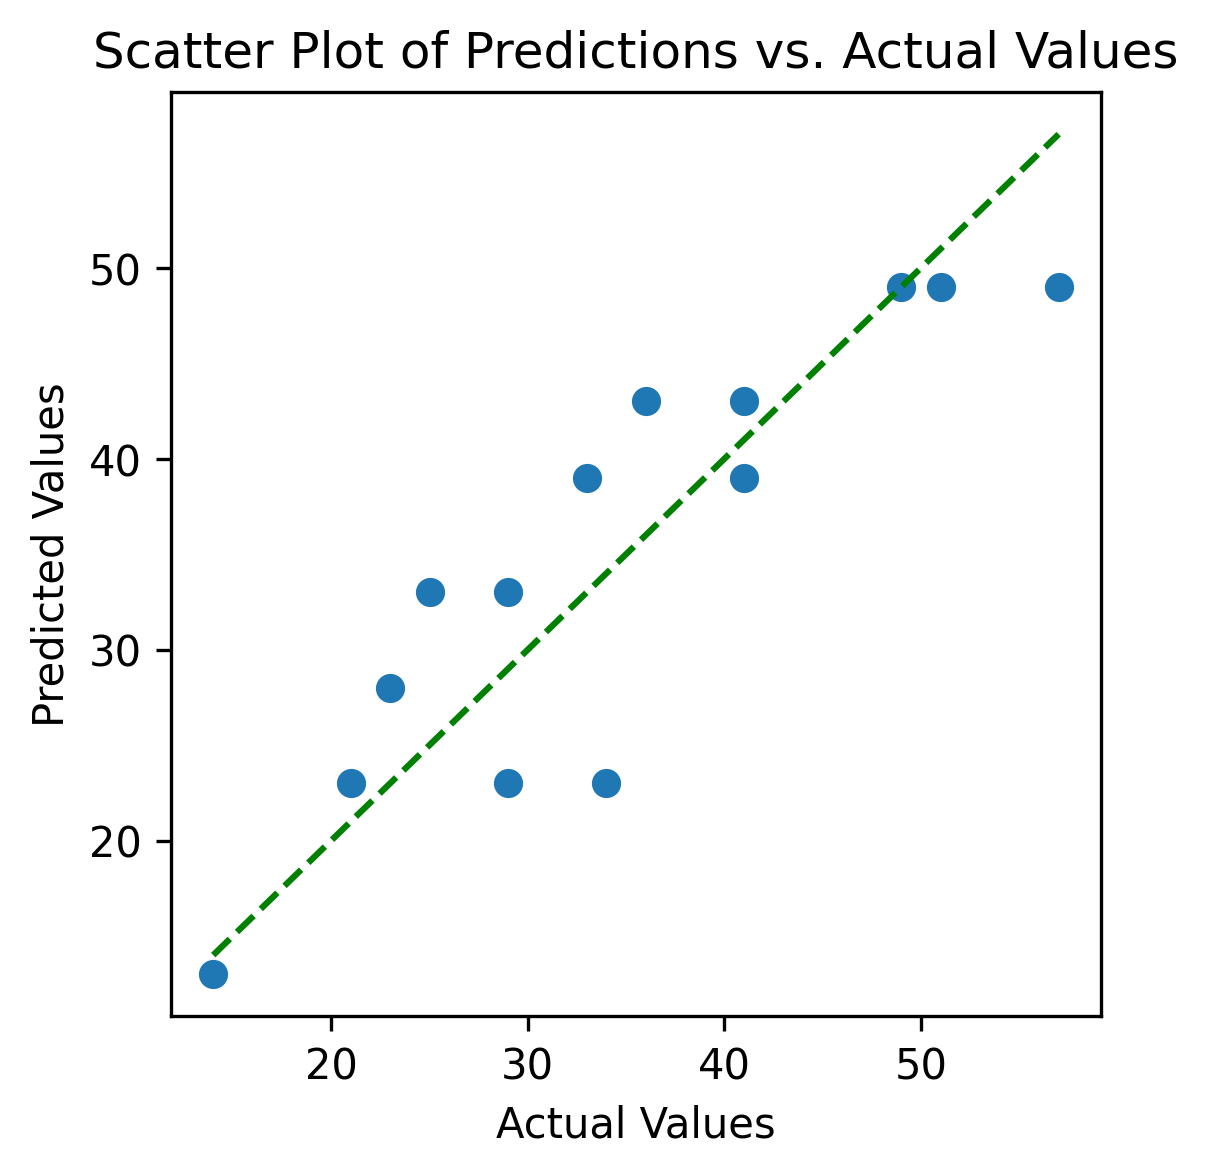

In [ ]:
# Importing Necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics       import mean_squared_error, mean_absolute_error
from sklearn.metrics       import median_absolute_error, mean_squared_log_error
from sklearn.metrics       import r2_score
import pandas as pd
import numpy as np

# READ DATA ── Load the dataset from a specified URL.
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# SPLIT THE DATA into training and testing sets
X, y_reg = df.drop(['Play','Num_Players'], axis=1), df['Num_Players']
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, train_size=0.5, shuffle=False)

# SCALE THE NUMERICAL COLUMNS in the training and testing sets
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

# TRAIN THE MODEL
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_reg_train)

# TEST THE MODEL
y_reg_pred = model.predict(X_test)

# EVALUATE THE MODEL
print(f"Root Mean Squared Error : {mean_squared_error(y_reg_test, y_reg_pred, squared=False):.4f}")
print(f"Mean Absolute Error     : {mean_absolute_error(y_reg_test, y_reg_pred):.4f}")
print(f"Mean Sq Log Error       : {mean_squared_log_error(y_reg_test, y_reg_pred):.4f}")
print(f"Median Absolute Error   : {median_absolute_error(y_reg_test, y_reg_pred):.4f}")
print(f"R2 Score                : {r2_score(y_reg_test, y_reg_pred):.4f}")

# EVALUATE WITH VISUALIZATION
## Residual Plot
residuals = y_reg_test - y_reg_pred
result_df = pd.DataFrame({'Actual': y_reg_test, 'Predicted': y_reg_pred, 'Residuals': residuals})

plt.figure(figsize=(4, 3), dpi=300)
plt.scatter(result_df['Predicted'], result_df['Residuals'])
plt.axhline(y=0, color='grey', linestyle='--')  # Add a horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Scatterplot Predictions vs Actual Values
plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(result_df['Actual'], result_df['Predicted'])
plt.plot([result_df['Actual'].min(), result_df['Actual'].max()], [result_df['Actual'].min(), result_df['Actual'].max()], 'g--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predictions vs. Actual Values')
plt.show()

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 07-2**
</div>

Root Mean Squared Error : 7.0260
Mean Absolute Error     : 5.9700
Mean Sq Log Error       : 0.0393
Median Absolute Error   : 5.1390
R2 Score                : 0.6480


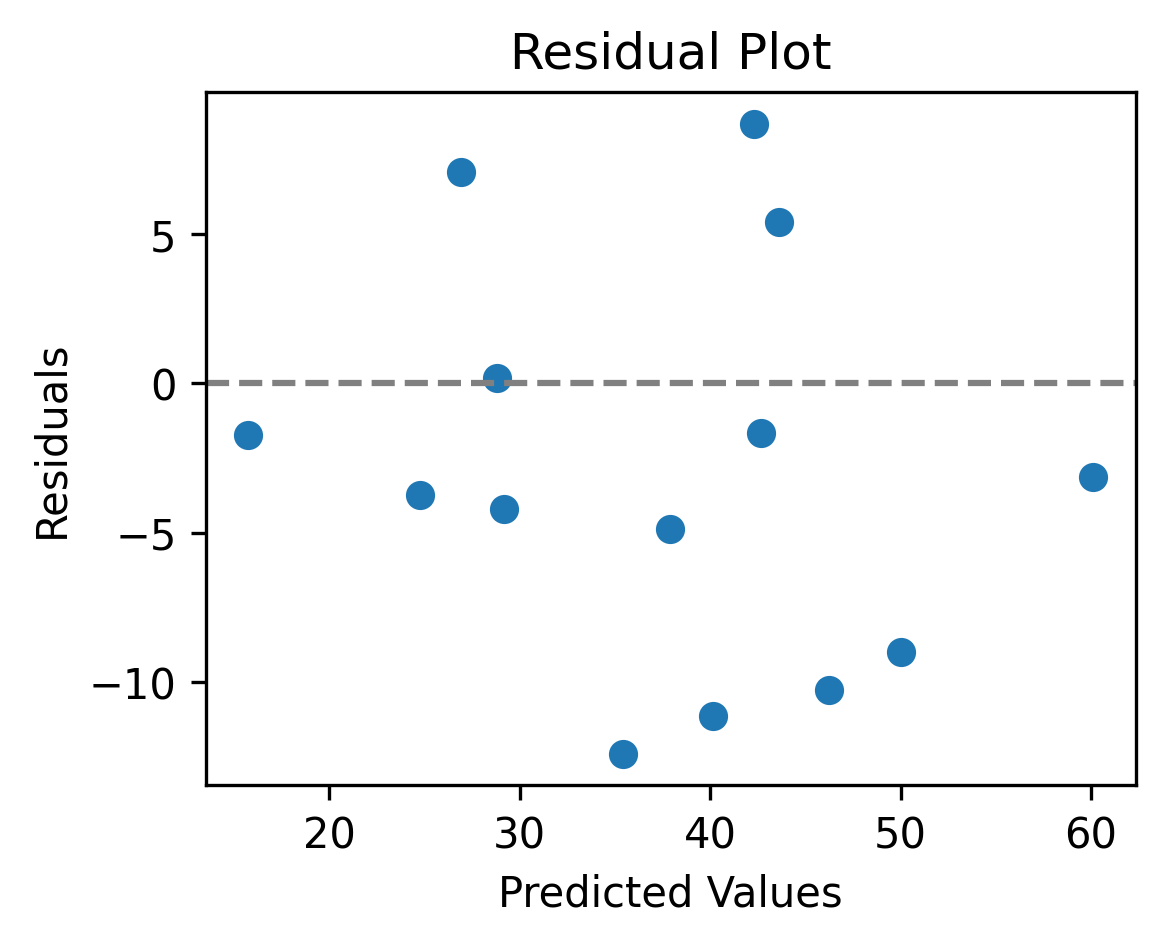

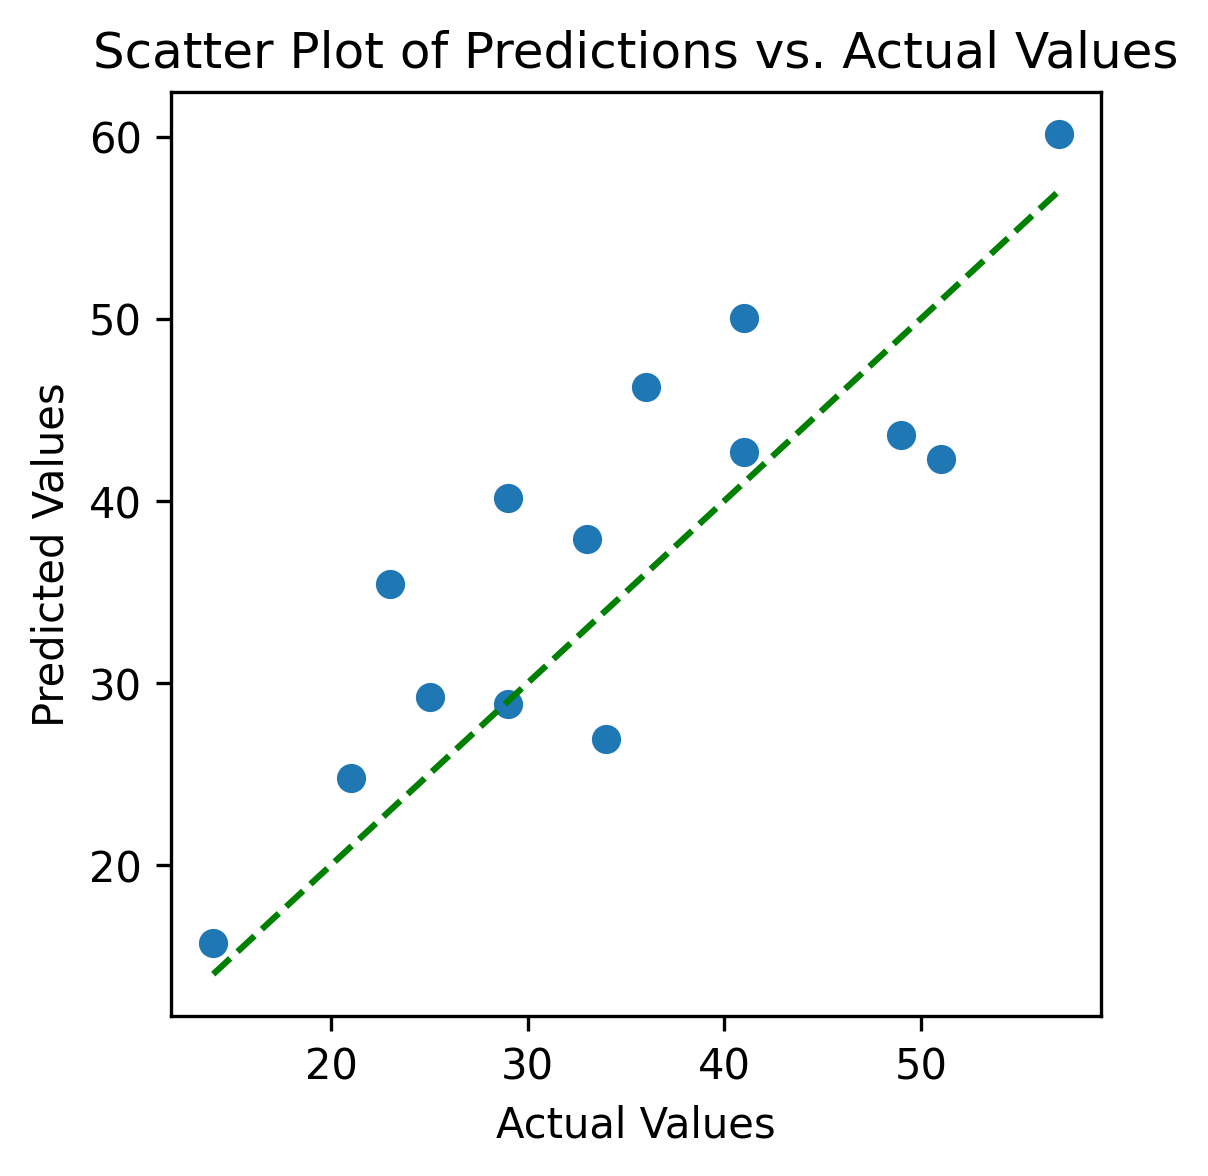

In [ ]:
# IMPORTING DATASET #
from sklearn.calibration import calibration_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics       import mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Set feature matrix X and target vector y for both classification
X, y_reg = df.drop(['Play','Num_Players'], axis=1), df['Num_Players']

# Split the data into training and testing sets
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, train_size=0.5, shuffle=False)

# SCALE THE NUMERICAL COLUMNS in the training and testing sets
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols])
X_test[float_cols] = scaler.transform(X_test[float_cols])

#  FIT THE MODEL
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_reg_train)
y_reg_pred = lr_reg.predict(X_test)

# EVALUATE THE MODEL using Mean Squared Log Error
#print(f"Mean Sq Log Error       : {???}")

# PLOT RESIDUAL PLOT
# ???

# EVALUATE THE MODEL
print(f"Root Mean Squared Error : {mean_squared_error(y_reg_test, y_reg_pred, squared=False):.4f}")
print(f"Mean Absolute Error     : {mean_absolute_error(y_reg_test, y_reg_pred):.4f}")
print(f"Mean Sq Log Error       : {mean_squared_log_error(y_reg_test, y_reg_pred):.4f}")
print(f"Median Absolute Error   : {median_absolute_error(y_reg_test, y_reg_pred):.4f}")
print(f"R2 Score                : {r2_score(y_reg_test, y_reg_pred):.4f}")

# EVALUATE WITH VISUALIZATION
## Residual Plot
residuals = y_reg_test - y_reg_pred
result_df = pd.DataFrame({'Actual': y_reg_test, 'Predicted': y_reg_pred, 'Residuals': residuals})

plt.figure(figsize=(4, 3), dpi=300)
plt.scatter(result_df['Predicted'], result_df['Residuals'])
plt.axhline(y=0, color='grey', linestyle='--')  # Add a horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

## Scatterplot Predictions vs Actual Values
plt.figure(figsize=(4, 4), dpi=300)
plt.scatter(result_df['Actual'], result_df['Predicted'])
plt.plot([result_df['Actual'].min(), result_df['Actual'].max()], [result_df['Actual'].min(), result_df['Actual'].max()], 'g--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predictions vs. Actual Values')
plt.show()

---
---

<div class='markdown-google-sans'>

## **07.3**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Data Leakage**
</div>
<img src="https://i.imgur.com/yEkiKtN.png" width=850 />

<img src="https://i.imgur.com/6w1UNu6.png" width=850 />
<!--
<img src="https://i.imgur.com/4hPhaXI.png" width=850 />
-->

<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>
<img src="https://i.imgur.com/MH7f101.png" width=850 />


In [ ]:
# IMPORTING DATASET #
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

dataset_url = "https://www.dropbox.com/scl/fi/aau6jg85cooqcd1l31dsg/golf_dataset_mini.csv?rlkey=9zebu7uq63m4jgg9okfhhe1p9&st=go39d6sw&dl=0&raw=1"
df = pd.read_csv(dataset_url)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# Set feature matrix X and target vector y
X, y = df.drop(columns='Play'), df['Play']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

print(pd.concat([X_train, y_train], axis=1), end='\n\n')
print(pd.concat([X_test, y_test], axis=1))

     Outlook  Temperature  Humidity   Wind  Play
0      sunny        85.00     85.00  False     0
1      sunny        80.00     90.00   True     0
2   overcast        83.00     78.00  False     1
3       rain        70.00     96.00  False     1
4       rain        68.00     80.00  False     1
5       rain        65.00     70.00   True     0
6   overcast        64.00     65.00   True     1
7      sunny        72.00     95.00  False     0
8      sunny        69.00     70.00  False     1
9       rain        75.00     80.00  False     1
10     sunny        75.00     70.00   True     1
11  overcast        72.00     90.00   True     1
12  overcast        81.00     75.00  False     1
13      rain        71.00     80.00   True     0

     Outlook  Temperature  Humidity   Wind  Play
14     sunny        81.00     88.00   True     0
15  overcast        74.00     92.00  False     1
16      rain        76.00     85.00  False     1
17     sunny        78.00     75.00   True     0
18     sunny       

<div class='markdown-google-sans'>

### **<font color=#819A00> Handling Missing Values**
</div>
 <img src="https://i.imgur.com/YokhH3c.png" width=850 />

 <img src="https://i.imgur.com/O6IxL3e.png" width=850 />


In [ ]:
# Importing Necessary Libraries
from sklearn.preprocessing   import OneHotEncoder
from sklearn.pipeline        import make_pipeline
from sklearn.ensemble        import RandomForestClassifier
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score
from sklearn.impute          import SimpleImputer

# PREPROCESS DATA -- using ColumnTransformer
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('num_imp', SimpleImputer(strategy='mean'), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
], remainder='passthrough')

# MAKE A MODEL -- combine with the preprocessor
training_pipeline = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state=0)
)

# FIT & TEST THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
test_scores = accuracy_score(y_test, y_pred)
print(f"Accuracy: {test_scores:.3f}")

Accuracy: 0.857


<div class='markdown-google-sans'>

### **<font color=#819A00> Encoding Categorical Data**
</div>
<img src="https://i.imgur.com/uqZYlPw.png" width=850 />

<img src="https://i.imgur.com/gL6nHdt.png" width=850 />

<img src="https://i.imgur.com/dnaHew0.png" width=850 />


In [ ]:
# Importing Necessary Libraries
from sklearn.preprocessing   import StandardScaler, OneHotEncoder
from sklearn.pipeline        import make_pipeline
from sklearn.ensemble        import RandomForestClassifier
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score
from sklearn.impute          import SimpleImputer

# PREPROCESS DATA -- using ColumnTransformer
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer([
    ('num_imp', SimpleImputer(strategy='mean'), numerical_cols),
    ('ohe', OneHotEncoder(), ['Outlook', 'Wind']),
], remainder='passthrough')

# MAKE A MODEL -- combine with the preprocessor
training_pipeline = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state=0)
)

# FIT & TEST THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
test_scores = accuracy_score(y_test, y_pred)
print(f"Accuracy: {test_scores:.3f}")

Accuracy: 0.857


<div class='markdown-google-sans'>

### **<font color=#819A00> Discretization & Binning**
</div>
<img src="https://i.imgur.com/pijdjh9.png" width=850 />

<img src="https://i.imgur.com/BbLfva7.png" width=850 />


In [ ]:
# Importing Necessary Libraries
from sklearn.preprocessing   import StandardScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.pipeline        import make_pipeline
from sklearn.ensemble        import RandomForestClassifier
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score
from sklearn.impute          import SimpleImputer

# PREPROCESS DATA -- using ColumnTransformer
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer([
    ('num_imp', SimpleImputer(strategy='mean'), numerical_cols),
    ('ohe', OneHotEncoder(), ['Outlook', 'Wind']),
    ('kbd', KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform'), ['Temperature', 'Humidity'])
], remainder='passthrough')

# MAKE A MODEL -- combine with the preprocessor
training_pipeline = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state=0)
)

# FIT & TEST THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
test_scores = accuracy_score(y_test, y_pred)
print(f"Accuracy: {test_scores:.3f}")

Accuracy: 0.857


<div class='markdown-google-sans'>

### **<font color=#819A00> Normalization & Standardization**
</div>
<img src="https://i.imgur.com/jNML7jN.png" width=850 />

<img src="https://i.imgur.com/5b99WIP.png" width=850 />


In [ ]:
# Importing Necessary Libraries
from sklearn.preprocessing   import StandardScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.pipeline        import make_pipeline
from sklearn.ensemble        import RandomForestClassifier
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score
from sklearn.impute          import SimpleImputer

# PREPROCESS DATA -- using ColumnTransformer
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer([
    ('num_imp', SimpleImputer(strategy='mean'), numerical_cols),
    ('ohe', OneHotEncoder(), ['Outlook', 'Wind']),
    ('std_scal', StandardScaler(), numerical_cols),
], remainder='passthrough')

# MAKE A MODEL -- combine with the preprocessor
training_pipeline = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state=0)
)

# FIT & TEST THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
test_scores = accuracy_score(y_test, y_pred)
print(f"Accuracy: {test_scores:.3f}")

Accuracy: 0.857


<img src="https://i.imgur.com/1iU46zo.png" width=850 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Making Pipeline Summarized**
</div>

In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.pipeline        import make_pipeline
from sklearn.ensemble        import RandomForestClassifier
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score
from sklearn.impute          import SimpleImputer

dataset_url = "https://www.dropbox.com/scl/fi/aau6jg85cooqcd1l31dsg/golf_dataset_mini.csv?rlkey=9zebu7uq63m4jgg9okfhhe1p9&st=go39d6sw&dl=0&raw=1"
df = pd.read_csv(dataset_url)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# SET FEATURE & TARGET THEN SPLIT
X, y = df.drop(columns='Play'), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# PREPROCESS DATA -- using ColumnTransformer
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std_scal', StandardScaler(), numerical_cols),
], remainder='passthrough')

# MAKE A MODEL -- combine with the preprocessor
training_pipeline = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state=0)
)

# FIT & TEST THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
test_scores = accuracy_score(y_test, y_pred)
print(f"Accuracy: {test_scores:.3f}")

Accuracy: 0.857


<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 07-3**
</div>

Copy the above data science process and change the ML algorithm to be using RandomForestRegressor.

Also, the final score and test will be using R^2 score.

In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.pipeline        import make_pipeline
from sklearn.ensemble        import RandomForestRegressor
from sklearn.ensemble        import RandomForestClassifier

from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import r2_score
from sklearn.impute          import SimpleImputer

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Data Preparation
X, y = df.drop(['Play','NumPlayers'], axis=1), df['NumPlayers']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, shuffle=False)

# Answer
# PREPROCESS DATA -- using ColumnTransformer
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std_scal', StandardScaler(), numerical_cols),
], remainder='passthrough')

# MAKE A MODEL -- combine with the preprocessor
training_pipeline = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state=0)
)

# FIT & TEST THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
test_scores = accuracy_score(y_test, y_pred)
print(f"Accuracy: {test_scores:.3f}")


#??????

Accuracy: 0.087


---
---

<div class='markdown-google-sans'>

## **07.4**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Model Validation**
</div>
<img src="https://i.imgur.com/d4qrZUx.png" width=850 />

<img src="https://i.imgur.com/A5JyGlt.png" width=850 />

<img src="https://i.imgur.com/GokHBgZ.png" width=850 />



<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>
<img src="https://i.imgur.com/MH7f101.png" width=850 />


In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing   import StandardScaler, OneHotEncoder
from sklearn.pipeline        import make_pipeline
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score

dataset_url = "https://www.dropbox.com/scl/fi/aau6jg85cooqcd1l31dsg/golf_dataset_mini.csv?rlkey=9zebu7uq63m4jgg9okfhhe1p9&st=go39d6sw&dl=0&raw=1"
df = pd.read_csv(dataset_url)
df['Play'] = (df['Play'] == 'Yes').astype(int)

print(df)

     Outlook  Temperature  Humidity   Wind  Play
0      sunny        85.00     85.00  False     0
1      sunny        80.00     90.00   True     0
2   overcast        83.00     78.00  False     1
3       rain        70.00     96.00  False     1
4       rain        68.00     80.00  False     1
5       rain        65.00     70.00   True     0
6   overcast        64.00     65.00   True     1
7      sunny        72.00     95.00  False     0
8      sunny        69.00     70.00  False     1
9       rain        75.00     80.00  False     1
10     sunny        75.00     70.00   True     1
11  overcast        72.00     90.00   True     1
12  overcast        81.00     75.00  False     1
13      rain        71.00     80.00   True     0
14     sunny        81.00     88.00   True     0
15  overcast        74.00     92.00  False     1
16      rain        76.00     85.00  False     1
17     sunny        78.00     75.00   True     0
18     sunny        82.00     92.00  False     0
19      rain        

<div class='markdown-google-sans'>

### **<font color=#819A00> Split Validation**
</div>
<img src="https://i.imgur.com/52jneTL.png" width=850 />


<div class='markdown-google-sans'>

#### **Basic Split**
</div>
<img src="https://i.imgur.com/yrMkzZM.png" width=850 />


In [ ]:
from sklearn.model_selection import train_test_split

X, y = df.drop(columns='Play'), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train)
print(X_test)

     Outlook  Temperature  Humidity   Wind
15  overcast        74.00     92.00  False
1      sunny        80.00     90.00   True
4       rain        68.00     80.00  False
5       rain        65.00     70.00   True
2   overcast        83.00     78.00  False
16      rain        76.00     85.00  False
23  overcast        77.00     70.00  False
3       rain        70.00     96.00  False
26      rain        66.00     70.00  False
24     sunny        79.00     60.00  False
18     sunny        82.00     92.00  False
27  overcast        84.00     78.00  False
20  overcast        85.00     85.00   True
7      sunny        72.00     95.00  False
10     sunny        75.00     70.00   True
14     sunny        81.00     88.00   True
19      rain        67.00     90.00   True
6   overcast        64.00     65.00   True
     Outlook  Temperature  Humidity   Wind
9       rain        75.00     80.00  False
25  overcast        80.00     95.00   True
8      sunny        69.00     70.00  False
21      rai

<img src="https://i.imgur.com/jhT2azt.png" width=850 />


In [ ]:
# MAKE A PREPROCESSOR
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['Outlook', 'Wind']),
    ('std_scal', StandardScaler(), ['Temperature', 'Humidity']),
], remainder='passthrough')

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    KNeighborsClassifier()
)

# FIT, PREDICT, SCORE THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Accuracy: 0.600


<div class='markdown-google-sans'>

#### **No Shuffle**
</div>
<img src="https://i.imgur.com/3oPrNOr.png" width=850 />


In [ ]:
from sklearn.model_selection import train_test_split

X, y = df.drop(columns='Play'), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    shuffle=False)

print(X_train)
print(X_test)

     Outlook  Temperature  Humidity   Wind
0      sunny        85.00     85.00  False
1      sunny        80.00     90.00   True
2   overcast        83.00     78.00  False
3       rain        70.00     96.00  False
4       rain        68.00     80.00  False
5       rain        65.00     70.00   True
6   overcast        64.00     65.00   True
7      sunny        72.00     95.00  False
8      sunny        69.00     70.00  False
9       rain        75.00     80.00  False
10     sunny        75.00     70.00   True
11  overcast        72.00     90.00   True
12  overcast        81.00     75.00  False
13      rain        71.00     80.00   True
14     sunny        81.00     88.00   True
15  overcast        74.00     92.00  False
16      rain        76.00     85.00  False
17     sunny        78.00     75.00   True
     Outlook  Temperature  Humidity   Wind
18     sunny        82.00     92.00  False
19      rain        67.00     90.00   True
20  overcast        85.00     85.00   True
21      rai

<img src="https://i.imgur.com/eOxrZYj.png" width=850 />


In [ ]:
# MAKE A PREPROCESSOR
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['Outlook', 'Wind']),
    ('std_scal', StandardScaler(), ['Temperature', 'Humidity']),
], remainder='passthrough')

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    KNeighborsClassifier()
)

# FIT, PREDICT, SCORE THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Accuracy: 0.700


<div class='markdown-google-sans'>

### **<font color=#819A00> Stratified Split**
</div>
<img src="https://i.imgur.com/znSAbLH.png" width=850 />


In [ ]:
from sklearn.model_selection import train_test_split

X, y = df.drop(columns='Play'), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

print(pd.concat([X_train, y_train], axis=1).sort_values('Play'), '\n')
print(pd.concat([X_test, y_test], axis=1).sort_values('Play'))

     Outlook  Temperature  Humidity   Wind  Play
1      sunny        80.00     90.00   True     0
19      rain        67.00     90.00   True     0
14     sunny        81.00     88.00   True     0
18     sunny        82.00     92.00  False     0
0      sunny        85.00     85.00  False     0
5       rain        65.00     70.00   True     0
22     sunny        88.00     65.00   True     1
23  overcast        77.00     70.00  False     1
25  overcast        80.00     95.00   True     1
21      rain        73.00     88.00  False     1
12  overcast        81.00     75.00  False     1
9       rain        75.00     80.00  False     1
10     sunny        75.00     70.00   True     1
3       rain        70.00     96.00  False     1
20  overcast        85.00     85.00   True     1
4       rain        68.00     80.00  False     1
2   overcast        83.00     78.00  False     1
15  overcast        74.00     92.00  False     1 

     Outlook  Temperature  Humidity   Wind  Play
7      sunny      

<img src="https://i.imgur.com/FBFod02.png" width=850 />


In [ ]:
# MAKE A PREPROCESSOR
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['Outlook', 'Wind']),
    ('std_scal', StandardScaler(), ['Temperature', 'Humidity']),
], remainder='passthrough')

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    KNeighborsClassifier()
)

# FIT, PREDICT, EVALUATE THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Accuracy: 0.500


<div class='markdown-google-sans'>

### **<font color=#819A00> Cross Validation**
</div>
<img src="https://i.imgur.com/Qyzx0pV.png" width=850 />

<img src="https://i.imgur.com/JzNsGAH.png" width=850 />


<div class='markdown-google-sans'>

#### **K-Fold Cross-Validation**
</div>
<img src="https://i.imgur.com/5yM5GIx.png" width=850 />


In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Separate features and target variable
X, y = df.drop(columns='Play'), df['Play']

# MAKE A PREPROCESSOR
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['Outlook', 'Wind']),
    ('std_scal', StandardScaler(), ['Temperature', 'Humidity']),
], remainder='passthrough')

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    KNeighborsClassifier()
)

# CROSS VALIDATE THE MODEL
cv = KFold(n_splits=3, shuffle=False)
scores = cross_val_score(training_pipeline, X, y, cv=cv, scoring='accuracy')
print("Cross-Validation Accuracy:", scores)
print(f"Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )

Cross-Validation Accuracy: [0.70 0.78 0.56]
Accuracy: 0.678 ± 0.184


<img src="https://i.imgur.com/zS25n4q.png" width=850 />

<div class='markdown-google-sans'>

#### **Stratified K-Fold Cross-Validation**
</div>
<img src="https://i.imgur.com/i0nkija.png" width=850 />


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Separate features and target variable
X, y = df.drop(columns='Play'), df['Play']

# MAKE A PREPROCESSOR
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['Outlook', 'Wind']),
    ('std_scal', StandardScaler(), ['Temperature', 'Humidity']),
], remainder='passthrough')

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    KNeighborsClassifier()
)

# CROSS VALIDATE THE MODEL
cv = StratifiedKFold(n_splits=3)
scores = cross_val_score(training_pipeline, X, y, cv=cv, scoring='accuracy')
print("Cross-Validation Accuracy:", scores)
print(f"Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )

Cross-Validation Accuracy: [0.70 0.67 0.78]
Accuracy: 0.715 ± 0.094


<img src="https://i.imgur.com/k96id1N.png" width=850 />


<div class='markdown-google-sans'>

#### **Leave-One-Out Cross Validation (LOOCV)**
</div>
<img src="https://i.imgur.com/7IjnW1y.png" width=850 />


In [ ]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

# Separate features and target variable
X, y = df.drop(columns='Play'), df['Play']

# MAKE A PREPROCESSOR
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['Outlook', 'Wind']),
    ('std_scal', StandardScaler(), ['Temperature', 'Humidity']),
], remainder='passthrough')

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    KNeighborsClassifier()
)

# CROSS VALIDATE THE MODEL
cv = LeaveOneOut()
scores = cross_val_score(training_pipeline, X, y, cv=cv, scoring='accuracy')
print("Cross-Validation Accuracy:", scores)
print(f"Accuracy: {np.mean(scores).round(3)}" )

Cross-Validation Accuracy: [1.00 1.00 1.00 1.00 1.00 1.00 0.00 0.00 1.00 1.00 0.00 0.00 1.00 0.00
 1.00 1.00 1.00 1.00 1.00 0.00 1.00 1.00 1.00 1.00 1.00 1.00 0.00 1.00]
Accuracy: 0.75


<img src="https://i.imgur.com/aOxRZD5.png" width=850 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Cross Validation with Hold-out Set**
</div>
<img src="https://i.imgur.com/DHkaHT8.png" width=850 />



In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Separate features and target variable
X, y = df.drop(columns='Play'), df['Play']

# SET THE TRAIN+VALIDATION AND TEST (HOLD-OUT) SET (25% of the Data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

# MAKE A PREPROCESSOR
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['Outlook', 'Wind']),
    ('std_scal', StandardScaler(), ['Temperature', 'Humidity']),
], remainder='passthrough')

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    KNeighborsClassifier()
)

# CROSS VALIDATE THE MODEL
cv = StratifiedKFold(n_splits=3)
scores = cross_val_score(training_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )

# FIT, PREDICT, SCORE THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Cross-Validation Accuracy: 0.667 ± 0.134
Final Test Accuracy: 0.857


<img src="https://i.imgur.com/LJaNyBR.png" width=850 />


(Insert comparison of k)

<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟 Model Validation (with Hold-out) Summarized**
</div>

In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold, LeaveOneOut, KFold
from sklearn.preprocessing   import StandardScaler, OneHotEncoder
from sklearn.pipeline        import make_pipeline
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score

# LOAD THE DATASET
dataset_url = "https://www.dropbox.com/scl/fi/aau6jg85cooqcd1l31dsg/golf_dataset_mini.csv?rlkey=9zebu7uq63m4jgg9okfhhe1p9&st=go39d6sw&dl=0&raw=1"
df = pd.read_csv(dataset_url)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# SEPARATE FEATURES AND TARGET VARIABLE
X, y = df.drop(columns='Play'), df['Play']

# SET THE TRAIN+VALIDATION AND TEST (HOLD-OUT) SET (25% of the Data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

# MAKE A PREPROCESSOR
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['Outlook', 'Wind']),
    ('std_scal', StandardScaler(), ['Temperature', 'Humidity']),
], remainder='passthrough')

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    KNeighborsClassifier()
)

# CROSS VALIDATE THE MODEL
cv = StratifiedKFold(n_splits=3)
#cv = KFold(n_splits=3)
#cv = LeaveOneOut()
scores = cross_val_score(training_pipeline, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )

# FIT, PREDICT, SCORE THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Cross-Validation Accuracy: 0.667 ± 0.134
Final Test Accuracy: 0.857


<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 07-4**
</div>

In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing   import StandardScaler, OneHotEncoder
from sklearn.pipeline        import make_pipeline
from sklearn.tree            import DecisionTreeRegressor
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import mean_squared_error
from sklearn.model_selection import cross_val_score, LeaveOneOut


# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# SEPARATE FEATURES AND TARGET VARIABLE
X, y = df.drop(columns=['Num_Players', 'Play']), df['Num_Players']

# SET THE TRAIN+VALIDATION AND TEST (HOLD-OUT) SET (30% of the Data)
# ???

# MAKE A PREPROCESSOR
preprocessor = ColumnTransformer([
    ('std_scal', StandardScaler(), ['Temperature', 'Humidity']),
], remainder='passthrough')

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    DecisionTreeRegressor(random_state=42)
)

# CROSS VALIDATE THE MODEL WITH LEAVE ONE OUT
# ???
#scores = cross_val_score(training_pipeline, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error')
#print(f"Cross-Validation RMSE: {-np.mean(scores).round(3)}" )

# FIT, PREDICT, SCORE THE MODEL
#training_pipeline.fit(X_train, y_train)
#y_pred = training_pipeline.predict(X_test)
#print(f"Final Test RMSE: {mean_squared_error(y_test, y_pred, squared=False):.3f}")

# cv = StratifiedKFold(n_splits=3)
#cv = KFold(n_splits=3)
cv = LeaveOneOut()
scores = cross_val_score(training_pipeline, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error')
print(f"Cross-Validation RMSE: {-np.mean(scores).round(3)}" )

# FIT, PREDICT, SCORE THE MODEL
training_pipeline.fit(X_train, y_train)
y_pred = training_pipeline.predict(X_test)
print(f"Final Test RMSE: {mean_squared_error(y_test, y_pred, squared=False):.3f}")

ValueError: 
All the 120 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 3791, in get_loc
    return self._engine.get_loc(casted_key)
  File "index.pyx", line 152, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 181, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7080, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'Temperature'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/__init__.py", line 447, in _get_column_indices
    col_idx = all_columns.get_loc(col)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py", line 3798, in get_loc
    raise KeyError(key) from err
KeyError: 'Temperature'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 423, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 377, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/dist-packages/joblib/memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 957, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_set_output.py", line 157, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py", line 751, in fit_transform
    self._validate_column_callables(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py", line 459, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/__init__.py", line 455, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe


---
---

<div class='markdown-google-sans'>

## **07.5**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Hyperparameter Tuning**
</div>
<img src="https://i.imgur.com/fwsUH3r.png" width=850 />

<img src="https://i.imgur.com/3Sd2vuF.png" width=850 />

<img src="https://i.imgur.com/UrbPBan.png" width=850 />


<div class='markdown-google-sans'>

### **<font color=#819A00> 🌟 Grid Search**
</div>



In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold, LeaveOneOut, KFold
from sklearn.preprocessing   import StandardScaler, OneHotEncoder
from sklearn.pipeline        import make_pipeline
from sklearn.tree            import DecisionTreeClassifier
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score

from sklearn.model_selection import GridSearchCV

# LOAD THE DATASET
dataset_url = "https://www.dropbox.com/scl/fi/aau6jg85cooqcd1l31dsg/golf_dataset_mini.csv?rlkey=9zebu7uq63m4jgg9okfhhe1p9&st=go39d6sw&dl=0&raw=1"
df = pd.read_csv(dataset_url)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# SEPARATE FEATURES AND TARGET VARIABLE
X, y = df.drop(columns='Play'), df['Play']

# SET THE TRAIN+VALIDATION AND TEST (HOLD-OUT) SET (25% of the Data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

# MAKE A PREPROCESSOR
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std_scal', StandardScaler(), numerical_cols),
], remainder='passthrough')

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    DecisionTreeClassifier()
)

# DEFINE PARAMETER GRID
param_grid = {
    'decisiontreeclassifier__max_depth': [None, 5, 4],
    'decisiontreeclassifier__min_samples_split': [2, 4],
    'decisiontreeclassifier__criterion': ['gini', 'entropy']
}

# PERFORM GRID SEARCH WITH THE CROSS VALIDATION
cv = StratifiedKFold(n_splits=3)
grid_search = GridSearchCV(estimator=training_pipeline,
                           param_grid=param_grid,
                           cv=cv, scoring='accuracy',
                           verbose=3)  # Set verbosity level. The higher the value, the more messages.
grid_search.fit(X_train, y_train)

# PRINT BEST PARAMETERS AND SCORE
print("\nBest Parameters:")
print(pd.Series(grid_search.best_params_))
print("\nBest Cross-Validation Accuracy:")
print(f"{grid_search.best_score_.round(3)} ± {2*np.std(grid_search.cv_results_['mean_test_score']).round(3)}")

# USE BEST MODEL ON TEST SET
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("\nFinal Test Accuracy with Best Model:")
print(accuracy_score(y_test, y_pred))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=2;, score=0.571 total time=   0.0s
[CV 2/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=2;, score=0.571 total time=   0.0s
[CV 3/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=2;, score=0.857 total time=   0.0s
[CV 1/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=4;, score=0.714 total time=   0.0s
[CV 2/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=None, decisiontreeclassifier__min_samples_split=4;, score=0.571 total time=   0.0s
[CV 3/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=No

<img src="https://i.imgur.com/MfGndAj.png" width=850 />

<img src="https://i.imgur.com/ozWoSZm.png" width=850 />

<img src="https://i.imgur.com/uXRMS1W.png" width=850 />

<img src="https://i.imgur.com/CJzHBcv.png" width=850 />

<img src="https://i.imgur.com/lCLeehm.png" width=850 />

<img src="https://i.imgur.com/k3HbpiU.png" width=850 />

<img src="https://i.imgur.com/iSXZCgy.png" width=850 />

<img src="https://i.imgur.com/DBSBh4U.png" width=850 />

<img src="https://i.imgur.com/sTpLaWd.png" width=850 />

<div class='markdown-google-sans'>

### **<font color=#819A00> 🌟 Random Search**
</div>

In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold, LeaveOneOut, KFold
from sklearn.preprocessing   import StandardScaler, OneHotEncoder
from sklearn.pipeline        import make_pipeline
from sklearn.tree            import DecisionTreeClassifier
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score

from sklearn.model_selection import RandomizedSearchCV

# LOAD THE DATASET
dataset_url = "https://www.dropbox.com/scl/fi/aau6jg85cooqcd1l31dsg/golf_dataset_mini.csv?rlkey=9zebu7uq63m4jgg9okfhhe1p9&st=go39d6sw&dl=0&raw=1"
df = pd.read_csv(dataset_url)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# SEPARATE FEATURES AND TARGET VARIABLE
X, y = df.drop(columns='Play'), df['Play']

# SET THE TRAIN+VALIDATION AND TEST (HOLD-OUT) SET (25% of the Data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

# MAKE A PREPROCESSOR
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std_scal', StandardScaler(), numerical_cols),
], remainder='passthrough')

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    DecisionTreeClassifier()
)

# DEFINE PARAMETER DISTRIBUTIONS
param_distributions = {
    'decisiontreeclassifier__max_depth': np.arange(1, 4, 15), # Number from 4 - 15
    'decisiontreeclassifier__min_samples_split': [2, 4],
    'decisiontreeclassifier__criterion': ['gini', 'entropy']
}

# PERFORM RANDOM SEARCH WITH THE CROSS VALIDOTION
cv = StratifiedKFold(n_splits=3)
random_search = RandomizedSearchCV(estimator=training_pipeline,
                                   param_distributions=param_distributions,
                                   cv=cv, scoring='accuracy', n_iter=10,
                                   verbose=3)  # Set verbosity level. The higher the value, the more messages.
random_search.fit(X_train, y_train)

# PRINT BEST PARAMETERS AND SCORE
print("\nBest Parameters:")
print(pd.Series(random_search.best_params_))
print("\nBest Cross-Validation Accuracy:")
print(f"{random_search.best_score_.round(3)} ± {2*np.std(random_search.cv_results_['mean_test_score']).round(3)}")

# USE BEST MODEL ON TEST SET
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("\nFinal Test Accuracy with Best Model:")
print(accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV 1/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=1, decisiontreeclassifier__min_samples_split=2;, score=0.714 total time=   0.0s
[CV 2/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=1, decisiontreeclassifier__min_samples_split=2;, score=0.571 total time=   0.0s
[CV 3/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=1, decisiontreeclassifier__min_samples_split=2;, score=0.857 total time=   0.0s
[CV 1/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=1, decisiontreeclassifier__min_samples_split=4;, score=0.714 total time=   0.0s
[CV 2/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=1, decisiontreeclassifier__min_samples_split=4;, score=0.571 total time=   0.0s
[CV 3/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=1, decisiontreecla


<img src="https://i.imgur.com/xm0g9aD.png" width=850 />

<img src="https://i.imgur.com/HvxPdRH.png" width=850 />

<img src="https://i.imgur.com/juPz5CA.png" width=850 />

<img src="https://i.imgur.com/BPYHu0F.png" width=850 />

<img src="https://i.imgur.com/k5fUXGI.png" width=850 />

<img src="https://i.imgur.com/CflTlOl.png" width=850 />

<img src="https://i.imgur.com/Dot96zl.png" width=850 />


<div class='markdown-google-sans'>

### **<font color=#819A00> 🌟 Bayesian Optimization**
</div>

In [ ]:
!pip install scikit-optimize

In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold, LeaveOneOut, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing   import StandardScaler, OneHotEncoder
from sklearn.pipeline        import make_pipeline
from sklearn.tree            import DecisionTreeClassifier
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score

from skopt       import BayesSearchCV
from skopt.space import Real, Categorical, Integer


# LOAD THE DATASET
dataset_url = "https://www.dropbox.com/scl/fi/aau6jg85cooqcd1l31dsg/golf_dataset_mini.csv?rlkey=9zebu7uq63m4jgg9okfhhe1p9&st=go39d6sw&dl=0&raw=1"
df = pd.read_csv(dataset_url)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# SEPARATE FEATURES AND TARGET VARIABLE
X, y = df.drop(columns='Play'), df['Play']

# SET THE TRAIN+VALIDATION AND TEST (HOLD-OUT) SET (25% of the Data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

# MAKE A PREPROCESSOR
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std_scal', StandardScaler(), numerical_cols),
], remainder='passthrough')

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    DecisionTreeClassifier()
)

# DEFINE PARAMETER SEARCH SPACE
search_spaces = {
    'decisiontreeclassifier__max_depth': Integer(3, 15),
    'decisiontreeclassifier__min_samples_split': Integer(2, 7),
    'decisiontreeclassifier__criterion': Categorical(['gini', 'entropy'])
}

# PERFORM BAYESIAN OPTIMIZATION SEARCH WITH THE CROSS VALIDATION
cv = StratifiedKFold(n_splits=3)
bayes_search = BayesSearchCV(estimator=training_pipeline,
                             search_spaces=search_spaces,
                             cv=cv, scoring='accuracy',
                             n_iter=15,
                             verbose=3)
bayes_search.fit(X_train, y_train)

# PRINT BEST PARAMETERS AND SCORE
print("\nBest Parameters:")
print(pd.Series(bayes_search.best_params_))
print("\nBest Cross-Validation Accuracy:")
print(f"{bayes_search.best_score_.round(3)} ± {2*np.std(bayes_search.cv_results_['mean_test_score']).round(3)}")

# USE BEST MODEL ON TEST SET
best_model = bayes_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("\nFinal Test Accuracy with Best Model:")
print(accuracy_score(y_test, y_pred))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=6, decisiontreeclassifier__min_samples_split=4;, score=0.714 total time=   0.0s
[CV 2/3] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=6, decisiontreeclassifier__min_samples_split=4;, score=0.571 total time=   0.0s
[CV 3/3] END decisiontreeclassifier__criterion=entropy, decisiontreeclassifier__max_depth=6, decisiontreeclassifier__min_samples_split=4;, score=1.000 total time=   0.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=3, decisiontreeclassifier__min_samples_split=7;, score=0.571 total time=   0.0s
[CV 2/3] END decisiontreeclassifier__criterion=gini, decisiontreeclassifier__max_depth=3, decisiontreeclassifier__min_samples_split=7;, score=0.571 total time=   0.0s
[CV 3/3] END decisiontreeclassifier__c


<img src="https://i.imgur.com/ubKg4fv.png" width=850 />

<img src="https://i.imgur.com/G89E5Lz.png" width=850 />

<img src="https://i.imgur.com/3q2ZO6x.png" width=850 />

<img src="https://i.imgur.com/MlGfUIq.png" width=850 />

<img src="https://i.imgur.com/ZqWBdkR.png" width=850 />

<img src="https://i.imgur.com/C4x7upM.png" width=850 />

<img src="https://i.imgur.com/I70DCXC.png" width=850 />

<img src="https://i.imgur.com/oYZcLjG.png" width=850 />

<img src="https://i.imgur.com/mHRXQ23.png" width=850 />


<img src="https://i.imgur.com/o5o9QuJ.png" width=850 />


<div class='markdown-google-sans'>

### **<font color=#819A00> 🌟 Tune-sklearn**
</div>

Tune-sklearn is a drop-in replacement for Scikit-Learn’s model selection module (GridSearchCV, RandomizedSearchCV) with cutting edge hyperparameter tuning techniques.

In [ ]:
!pip install "ray>=2.7,<2.10" -q
!pip install tune-sklearn==0.5.0 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 544.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 2.4 MB/s eta 0:00:00


#### GridSearch

In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold, LeaveOneOut, KFold
from sklearn.preprocessing   import StandardScaler, OneHotEncoder
from sklearn.pipeline        import make_pipeline
from sklearn.tree            import DecisionTreeClassifier
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score

from tune_sklearn import TuneGridSearchCV

# LOAD THE DATASET
dataset_url = "https://www.dropbox.com/scl/fi/aau6jg85cooqcd1l31dsg/golf_dataset_mini.csv?rlkey=9zebu7uq63m4jgg9okfhhe1p9&st=go39d6sw&dl=0&raw=1"
df = pd.read_csv(dataset_url)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# SEPARATE FEATURES AND TARGET VARIABLE
X, y = df.drop(columns='Play'), df['Play']

# SET THE TRAIN+VALIDATION AND TEST (HOLD-OUT) SET (25% of the Data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

# MAKE A PREPROCESSOR
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std_scal', StandardScaler(), numerical_cols),
], remainder='passthrough')

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    DecisionTreeClassifier()
)

# DEFINE PARAMETER GRID
param_grid = {
    'decisiontreeclassifier__max_depth': [None, 5, 4],
    'decisiontreeclassifier__min_samples_split': [2, 4],
    'decisiontreeclassifier__criterion': ['gini', 'entropy']
}

# PERFORM GRID SEARCH WITH THE CROSS VALIDATION
cv = StratifiedKFold(n_splits=3)
grid_search = TuneGridSearchCV(estimator=training_pipeline,
                               param_grid=param_grid,
                               cv=cv, scoring='accuracy',
                               verbose=2)  # Set verbosity level. The higher the value, the more messages.
grid_search.fit(X_train, y_train)

# PRINT BEST PARAMETERS AND SCORE
print("\nBest Parameters:")
print(pd.Series(grid_search.best_params_))
print("\nBest Cross-Validation Accuracy:")
print(f"{grid_search.best_score_.round(3)} ± {2*np.std(grid_search.cv_results_['mean_test_score']).round(3)}")

# USE BEST MODEL ON TEST SET
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("\nFinal Test Accuracy with Best Model:")
print(accuracy_score(y_test, y_pred))

2024-05-29 14:16:11,518	INFO tune.py:592 -- [output] This will use the new output engine with verbosity 2. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949


+-------------------------------------------------------------------+
| Configuration for experiment     _Trainable_2024-05-29_14-16-11   |
+-------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator            |
| Scheduler                        FIFOScheduler                    |
| Number of trials                 12                               |
+-------------------------------------------------------------------+

View detailed results here: /root/ray_results/_Trainable_2024-05-29_14-16-11
To visualize your results with TensorBoard, run: `tensorboard --logdir /root/ray_results/_Trainable_2024-05-29_14-16-11`

Trial status: 12 PENDING
Current time: 2024-05-29 14:16:12. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/0 GPUs
+--------------------------------------------------------------------------------------------------------------+
| Trial name               status       ...sifier__max_depth     ...min

#### RandomSearch

In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold, LeaveOneOut, KFold
from sklearn.preprocessing   import StandardScaler, OneHotEncoder
from sklearn.pipeline        import make_pipeline
from sklearn.tree            import DecisionTreeClassifier
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score

from tune_sklearn import TuneSearchCV

# LOAD THE DATASET
dataset_url = "https://www.dropbox.com/scl/fi/aau6jg85cooqcd1l31dsg/golf_dataset_mini.csv?rlkey=9zebu7uq63m4jgg9okfhhe1p9&st=go39d6sw&dl=0&raw=1"
df = pd.read_csv(dataset_url)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# SEPARATE FEATURES AND TARGET VARIABLE
X, y = df.drop(columns='Play'), df['Play']

# SET THE TRAIN+VALIDATION AND TEST (HOLD-OUT) SET (25% of the Data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

# MAKE A PREPROCESSOR
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std_scal', StandardScaler(), numerical_cols),
], remainder='passthrough')

# MAKE A TRAINING PIPELINE
training_pipeline = make_pipeline(
    preprocessor,
    DecisionTreeClassifier()
)

# DEFINE PARAMETER DISTRIBUTIONS
param_distributions = {
    'decisiontreeclassifier__max_depth': [i for i in range(4, 15)], # Number from 4 - 15
    'decisiontreeclassifier__min_samples_split': [2, 4],
    'decisiontreeclassifier__criterion': ['gini', 'entropy']
}

# PERFORM RANDOM SEARCH WITH THE CROSS VALIDOTION
random_search = TuneSearchCV(estimator=training_pipeline,
                             param_distributions=param_distributions,
                             n_trials=2,
                             cv=cv, scoring='accuracy', max_iters=10,
                             search_optimization="random",
                             verbose=3)  # Set verbosity level. The higher the value, the more messages.
random_search.fit(X_train, y_train)

# PRINT BEST PARAMETERS AND SCORE
print("\nBest Parameters:")
print(pd.Series(random_search.best_params_))
print("\nBest Cross-Validation Accuracy:")
print(f"{random_search.best_score_.round(3)} ± {2*np.std(random_search.cv_results_['mean_test_score']).round(3)}")

# USE BEST MODEL ON TEST SET
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

print("\nFinal Test Accuracy with Best Model:")
print(accuracy_score(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/tune_sklearn/tune_basesearch.py:365: UserWarning: max_iters is set > 1 but incremental/partial training is not enabled. To enable partial training, ensure the estimator has `partial_fit` or `warm_start` and set `early_stopping=True`. Automatically setting max_iters=1.
  warnings.warn(
2024-05-29 14:28:22,544	INFO tune.py:592 -- [output] This will use the new output engine with verbosity 2. To disable the new output and use the legacy output engine, set the environment variable RAY_AIR_NEW_OUTPUT=0. For more information, please see https://github.com/ray-project/ray/issues/36949


+-------------------------------------------------------------------+
| Configuration for experiment     _Trainable_2024-05-29_14-28-22   |
+-------------------------------------------------------------------+
| Search algorithm                 BasicVariantGenerator            |
| Scheduler                        FIFOScheduler                    |
| Number of trials                 2                                |
+-------------------------------------------------------------------+

View detailed results here: /root/ray_results/_Trainable_2024-05-29_14-28-22
To visualize your results with TensorBoard, run: `tensorboard --logdir /root/ray_results/_Trainable_2024-05-29_14-28-22`

Trial status: 2 PENDING
Current time: 2024-05-29 14:28:22. Total running time: 0s
Logical resource usage: 0/2 CPUs, 0/0 GPUs
+--------------------------------------------------------------------------------------------------------------+
| Trial name               status       ...sifier__max_depth     ...min_

<div class='markdown-google-sans'>

### **<font color=#819A00> 🌟 Optuna**
</div>

Optuna is a tool for automatically finding the best settings (hyperparameters) for machine learning models. It uses a smart method called "Sequential Model-Based Optimization" (SMBO) and a specific technique known as Tree-structured Parzen Estimator (TPE). This method creates a model to predict which settings are likely to work best and tests those.

Unlike grid search, which tries every possible combination, or random search, which picks settings randomly, Optuna makes educated guesses to find the best settings faster.

Compared to standard Bayesian optimization, Optuna's TPE is more flexible and often works better for complicated and high-dimensional problems.

In [ ]:
!pip install optuna -q
!pip install optuna-dashboard -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.2/90.2 kB 8.8 MB/s eta 0:00:00


In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold, LeaveOneOut, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing   import StandardScaler, OneHotEncoder
from sklearn.pipeline        import make_pipeline
from sklearn.tree            import DecisionTreeClassifier
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score

import optuna
import optuna.visualization as vis

# LOAD THE DATASET
dataset_url = "https://www.dropbox.com/scl/fi/aau6jg85cooqcd1l31dsg/golf_dataset_mini.csv?rlkey=9zebu7uq63m4jgg9okfhhe1p9&st=go39d6sw&dl=0&raw=1"
df = pd.read_csv(dataset_url)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# SEPARATE FEATURES AND TARGET VARIABLE
X, y = df.drop(columns='Play'), df['Play']

# SET THE TRAIN+VALIDATION AND TEST (HOLD-OUT) SET (25% OF THE DATA)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

# MAKE A PREPROCESSOR
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=(['object', 'category'])).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std_scal', StandardScaler(), numerical_cols),
], remainder='passthrough')

# MAKE A TRAINING PIPELINE
def create_pipeline(trial):
    # SUGGEST HYPERPARAMETERS
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 7)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    # CREATE A PIPELINE WITH PREPROCESSING AND A DECISIONTREECLASSIFIER
    pipeline = make_pipeline(
        preprocessor,
        DecisionTreeClassifier(
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            criterion=criterion,
            random_state=42
        )
    )
    return pipeline

# DEFINE THE OBJECTIVE FUNCTION
def objective(trial):
    pipeline = create_pipeline(trial)

    # PERFORM CROSS-VALIDATION
    cv = StratifiedKFold(n_splits=3)
    score = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy').mean()

    return score

# CREATE A STUDY AND OPTIMIZE THE OBJECTIVE FUNCTION
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=15)

# PRINT THE BEST HYPERPARAMETERS AND BEST SCORE
print("\nBest Hyperparameters:")
print(study.best_params)
print("\nBest Cross-Validation Accuracy:")
print(f"{study.best_value:.3f}")

# USE THE BEST MODEL ON THE TEST SET
best_pipeline = create_pipeline(optuna.trial.FixedTrial(study.best_params))
best_pipeline.fit(X_train, y_train)
y_pred = best_pipeline.predict(X_test)

print("\nFinal Test Accuracy with Best Model:")
print(accuracy_score(y_test, y_pred))

ModuleNotFoundError: No module named 'optuna'

In [ ]:
# Visualize the optimization results
vis.plot_optimization_history(study).show()
vis.plot_param_importances(study).show()
vis.plot_parallel_coordinate(study).show()
vis.plot_contour(study).show()

<div class='markdown-google-sans'>

# <font size=7>**ASSIGNMENT** <font color="#B8D71D">──────────</font></font>
</div>

The following is the dataset that you will use for this exercise. This is the same dataset and problems as the previous exercise. This will be the last time this dataset is used.

1. **`Date`**: The date of the observation is made.

2. **`Month`**: The month of the year (obtained from `Date`)

3. **`Season`**: The season of the year.

4. **`DaytimeDuration`**: The duration of daytime
(in hour)

5. **`SunshineDuration`**: The duration of sunshine (not blocked by cloud) in a day (in hour).

6. **`Temperature`**: The average day-time temperature (in Celcius).

7. **`Humidity`**: The average day-time humidity (in %)

8. **`RainfallAmount`**: The amount of rainfall in a day (in mm)

9. **`LightningStrikes`**: The number of lightning strike happening in a day in Golf Land.

10. **`Outlook`**: The day's majority outlook (sunny, overcast, rainy, snowy)

## 🎯 **Classification Goal**

### Based on all the other weather conditions, can we predict whether **there will be a thunder or not**?

## 🎯 **Regression Goal**

### Based on all the other weather conditions, can we predict **how many lightning strikes** happening in a day?

<div class='markdown-google-sans'>

## <font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Hyperparameter Tuning - Classification**
</div>



In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler, StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer

# LOAD THE DATASET
# GET DATA & ONE-HOT ENCODE ── Load the dataset and apply one-hot encoding to categorical attributes
dataset_url = "https://www.dropbox.com/scl/fi/aiy2iu2umt2uya941w5l7/golf_dataset_weather_seasonal_5year-2.csv?rlkey=yxeuy2c1b2435rr7zcp1ynm68&dl=0&raw=1"
df = pd.read_csv(dataset_url, index_col='Date')
df['Thunder'] = (df['LightningStrikes'] > 0).astype(int)

# SEPARATE FEATURES AND TARGET VARIABLE
X, y = df.drop(['Thunder', 'LightningStrikes'], axis=1), df['Thunder']

# SET THE TRAIN+VALIDATION AND TEST (HOLD-OUT) SET (20% of the Data)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)


# MAKE A PREPROCESSOR (ALL USING DEFAULT VALUES)
# OneHotEncoder for All Categorical Columns
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns

#Make a preprocessor
# MinMaxScaler for 'DaytimeDuration'
# RobustScaler for 'SunshineDuration'
# StandardScaler for 'Temperature', 'Humidity'
# KBinsDiscretizer for 'RainfallAmount'
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),  # OneHotEncode categorical columns
        ('daytime', MinMaxScaler(), ['DaytimeDuration']),  # MinMaxScaler for 'DaytimeDuration'
        ('sunshine', RobustScaler(), ['SunshineDuration']),  # RobustScaler for 'SunshineDuration'
        ('temp_hum', StandardScaler(), ['Temperature', 'Humidity']),  # StandardScaler for 'Temperature' and 'Humidity'
        ('rainfall', KBinsDiscretizer(n_bins=3, encode='onehot', strategy='uniform'), ['RainfallAmount'])  # KBinsDiscretizer for 'RainfallAmount'
    ]
)


# CREATE A TRAINING PIPELINE WITH THE preprocessor and GradientBoostingClassifier
training_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(random_state=0))
    ]
)
# DEFINE PARAMETER GRID

param_grid = {
    'classifier__n_estimators': [50, 70, 90, 100],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'classifier__min_samples_split': [2],
    'classifier__max_depth': [3],
    'classifier__min_samples_leaf': [4]
}
# - n_estimator: 50, 70, ..., 100 (every 20 unit)
# - learning_rate: 0.01 , 0.05, 0.1, 0.5, 1
# - min_samples_split, max_depth, min_samples_leaf: 2, 3, 4, None



# PERFORM GRID SEARCH WITH CROSS VALIDATION
# - Cross Validation: StratifiedKFold with n_splits=3
# - Scoring Metric: f1

cv = StratifiedKFold(n_splits=3)
grid_search = GridSearchCV(training_pipeline, param_grid, cv=cv, scoring='f1', n_jobs=-1, verbose = 1)

# FIT GRID SEARCH TO THE TRAINING DATA
grid_search.fit(X_train, y_train)

# PRINT BEST PARAMETERS AND F1-SCORE

print("Best Parameters: ", grid_search.best_params_)
print("Best F1-Score: ", grid_search.best_score_)

# USE BEST MODEL ON TEST SET

y_pred_test = grid_search.best_estimator_.predict(X_test)

print("Test F1-Score: ", f1_score(y_test, y_pred_test))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters:  {'classifier__learning_rate': 0.05, 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best F1-Score:  0.8533929050735773
Test F1-Score:  0.8661417322834645


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


<div class='markdown-google-sans'>

## <font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Hyperparameter Tuning - Regression**
</div>



In [ ]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, RobustScaler, StandardScaler, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error
from scipy.stats import randint

# LOAD THE DATASET
# GET DATA & ONE-HOT ENCODE ── Load the dataset and apply one-hot encoding to categorical attributes
dataset_url = "https://www.dropbox.com/scl/fi/aiy2iu2umt2uya941w5l7/golf_dataset_weather_seasonal_5year-2.csv?rlkey=yxeuy2c1b2435rr7zcp1ynm68&dl=0&raw=1"
df = pd.read_csv(dataset_url, index_col='Date')
df['Thunder'] = (df['LightningStrikes'] > 0).astype(int)

# SEPARATE FEATURES AND TARGET VARIABLE
X, y = df.drop(['Thunder', 'LightningStrikes'], axis=1), df['LightningStrikes']

# SPLIT DATA INTO TRAIN AND TEST SETS (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=False)

# MAKE A PREPROCESSOR (ALL TRANSFORMER USING DEFAULT VALUES)
categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns

# Create a preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),  # OneHotEncode categorical columns
        ('daytime', MinMaxScaler(), ['DaytimeDuration']),  # MinMaxScaler for 'DaytimeDuration'
        ('sunshine', RobustScaler(), ['SunshineDuration']),  # RobustScaler for 'SunshineDuration'
        ('temp_hum', StandardScaler(), ['Temperature', 'Humidity']),  # StandardScaler for 'Temperature' and 'Humidity'
        ('rainfall', KBinsDiscretizer(n_bins=3, encode='onehot', strategy='uniform'), ['RainfallAmount'])  # KBinsDiscretizer for 'RainfallAmount'
    ]
)

# CREATE A TRAINING PIPELINE WITH THE preprocessor and GradientBoostingRegressor
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor(random_state=42))
    ]
)

# DEFINE PARAMETER DISTRIBUTION FOR RANDOM SEARCH
param_dist = {
    'regressor__n_estimators': randint(10, 200),
    'regressor__min_samples_split': randint(2, 10),
    'regressor__max_depth': randint(2, 10),
    'regressor__min_samples_leaf': randint(2, 10)
}

# PERFORM RANDOM SEARCH WITH CROSS VALIDATION
cv = KFold(n_splits=5)

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=cv,
    scoring='neg_root_mean_squared_error',  # Scoring metric: neg_root_mean_squared_error
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# FIT THE RANDOM SEARCH ON TRAINING DATA
random_search.fit(X_train, y_train)

# PRINT BEST PARAMETERS AND Root Mean Squared Log Error
print("Best Parameters: ", random_search.best_params_)

# Predict on the test set using the best model
y_pred_test = random_search.best_estimator_.predict(X_test)

# Calculate Root Mean Squared Log Error (RMSLE) on the test set
rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred_test))
print(f"Test Root Mean Squared Log Error: {rmsle}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters:  {'regressor__max_depth': 4, 'regressor__min_samples_leaf': 9, 'regressor__min_samples_split': 6, 'regressor__n_estimators': 30}
Test Root Mean Squared Log Error: 0.4270126721632921


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
